# Libraries

In [176]:
import pandas as pd
import inflection
import missingno as msno
import seaborn as sns
import numpy as np
import re
import requests

import scipy.stats as stats
from scipy import stats as ss
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
from IPython.display import Image
from utils import *

import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, CDSView, IndexFilter
from bokeh.layouts import row, column
from scipy.stats import gaussian_kde
from bokeh.models import RangeSlider

from sklearn import preprocessing as pp
from imblearn import under_sampling as us
from imblearn import over_sampling as oversamp
from pandas_profiling import ProfileReport
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection as ms
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from sklearn.cluster import DBSCAN

import random
from sklearn import metrics as m
from sklearn.metrics import classification_report, cohen_kappa_score, roc_curve, brier_score_loss
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, recall_score, f1_score, roc_auc_score, precision_score, roc_curve
#from sklearn.metrics import plot_precision_recall_curve

from scikitplot import metrics as mt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_val_predict, RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
import category_encoders

from datetime import datetime, timedelta
import pickle

# Loading Data

In [2]:
pwd

'/Users/lucasquemelli/Documents/repos/customer_satisfaction_prediction'

In [3]:
# Reading all the files
raw_path = '/Users/lucasquemelli/Documents/repos/customer_satisfaction_prediction/'

olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [4]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


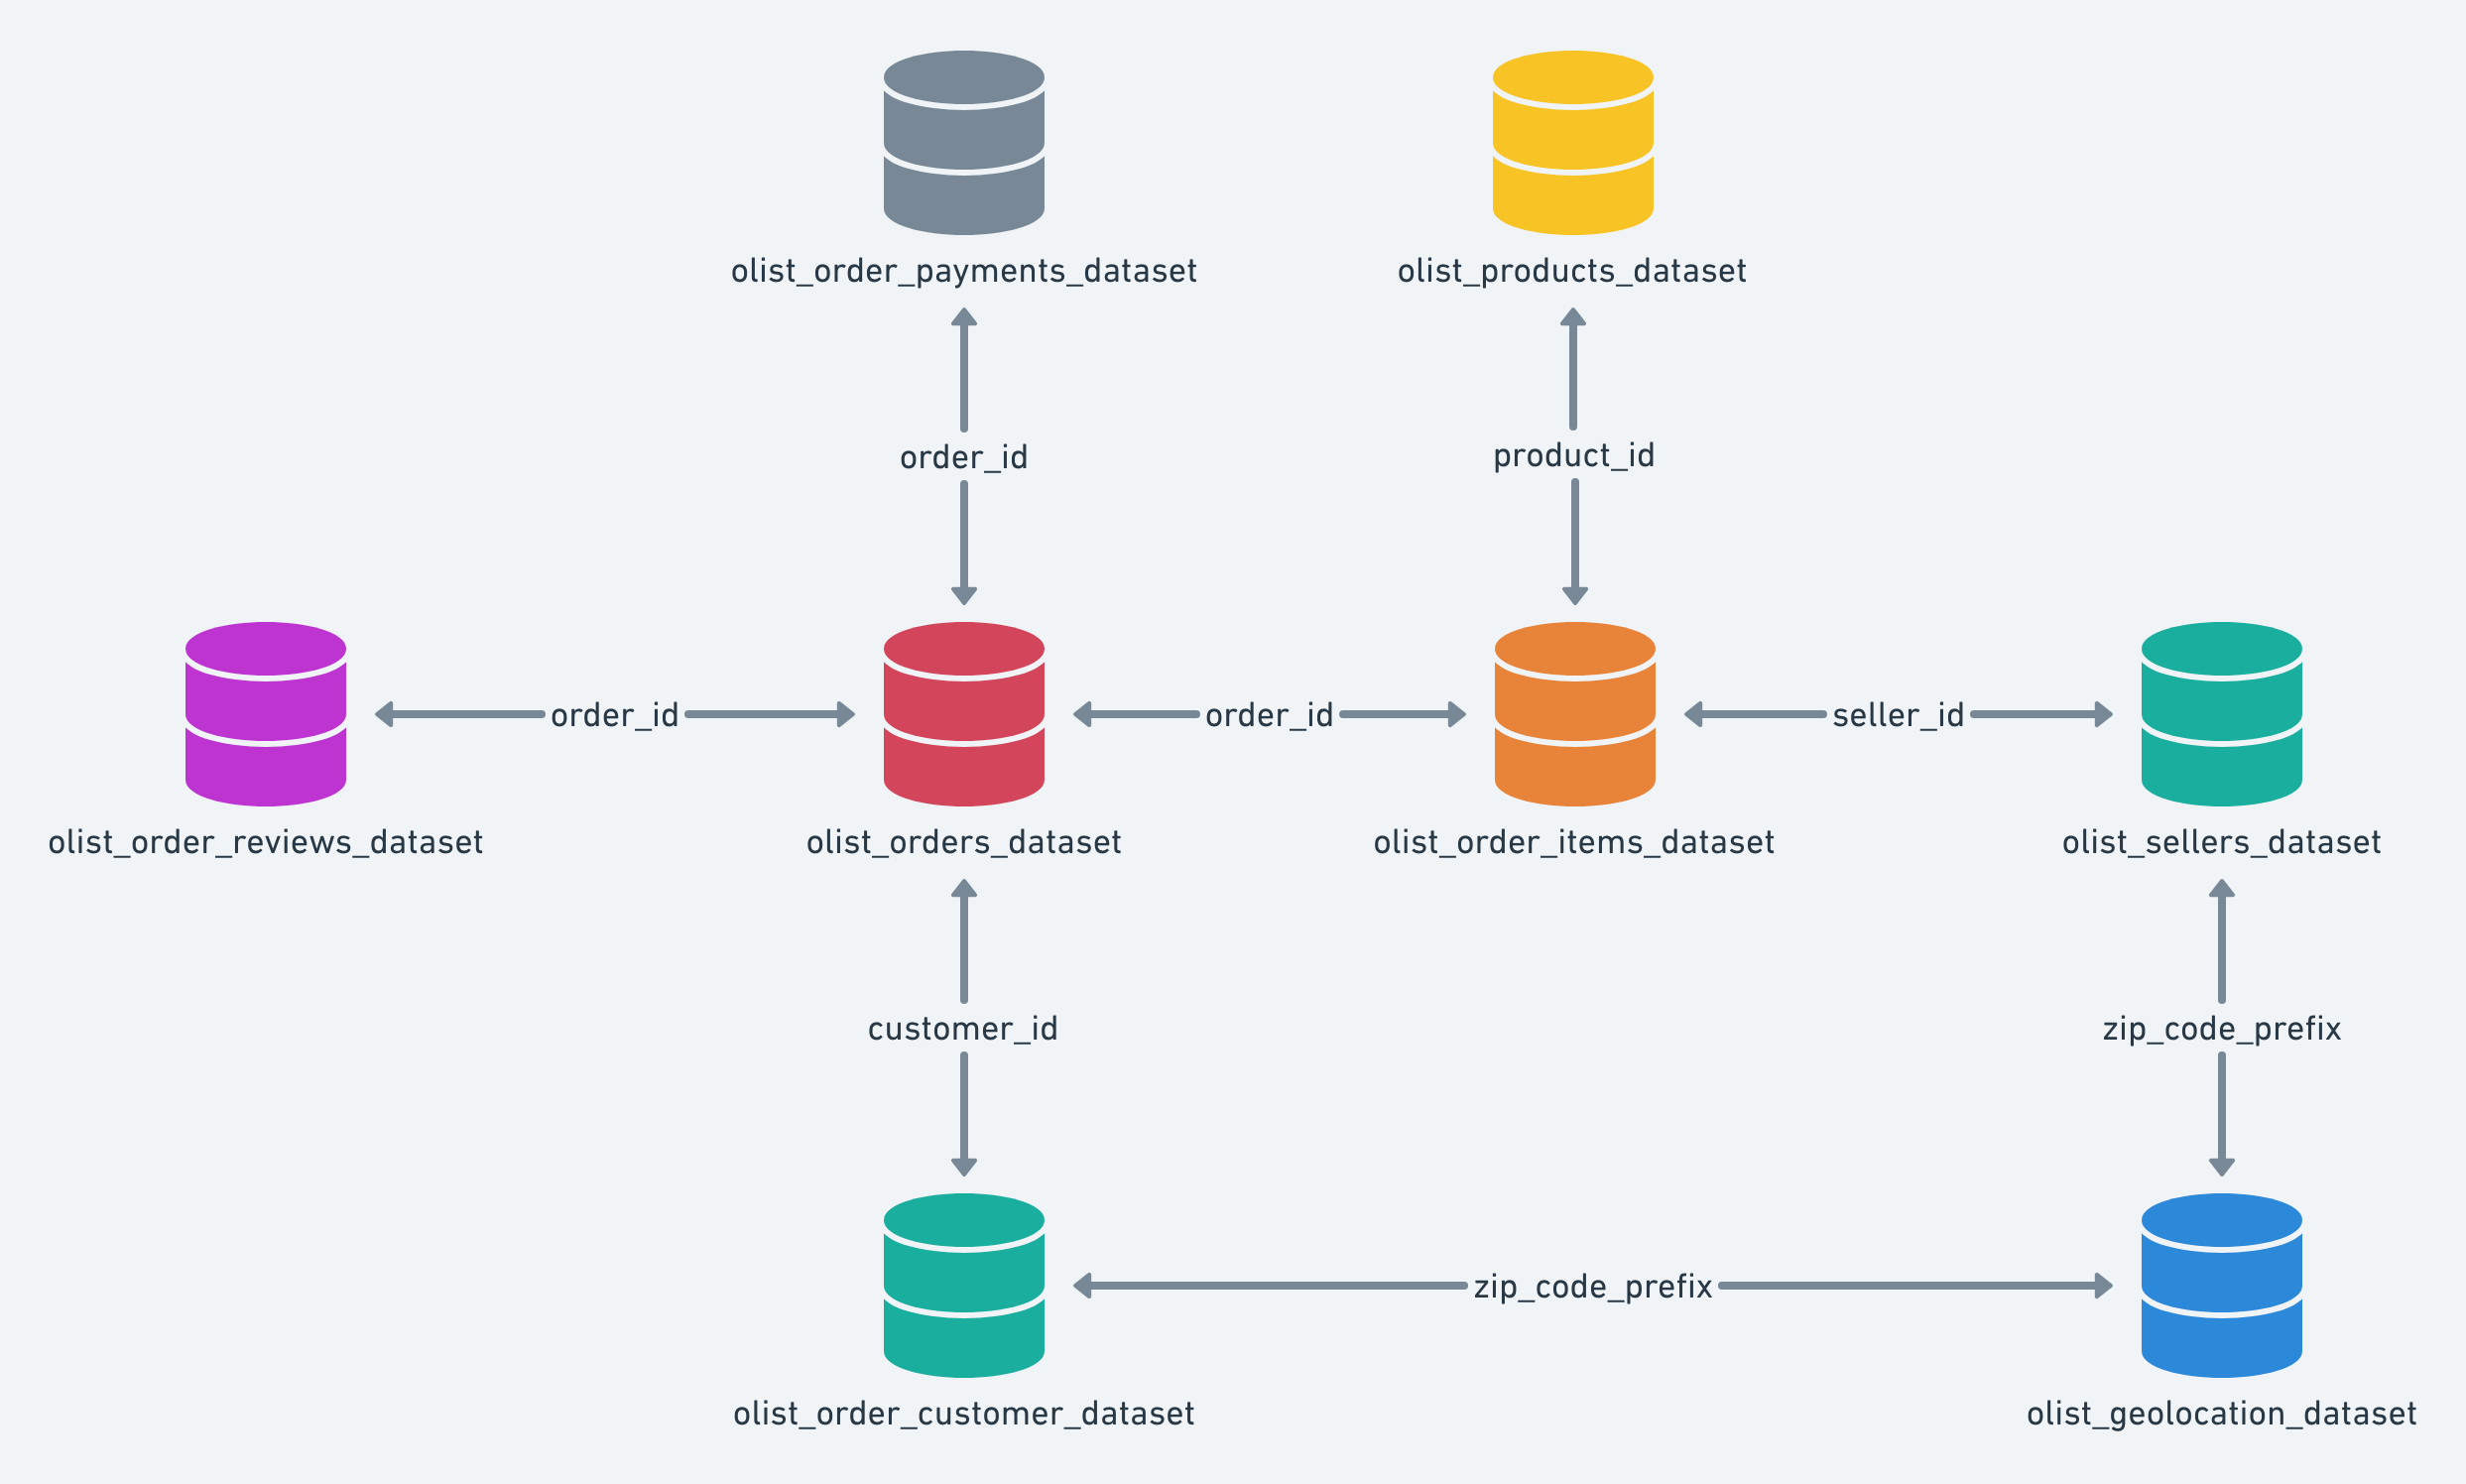

In [12]:
Image("Images/olist.png")

From the image above, we may know how the datasets are related. Thus, we may join all of them to make the analysis. Since we are going to perform a customer analysis, we are going to use the customer dataset as primary base. 

In [13]:
# LEFT JOIN 
data = pd.merge(olist_customer, olist_orders, on='customer_id', how='left')
data = pd.merge(data, olist_order_reviews, on='order_id', how='left')
data = pd.merge(data, olist_order_payments, on='order_id', how='left')
data = pd.merge(data, olist_order_items, on='order_id', how='left')
data = pd.merge(data, olist_products, on='product_id', how='left')
data = pd.merge(data, olist_sellers, on='seller_id', how='left')
data = pd.merge(data, olist_geolocation, 
                left_on=['customer_zip_code_prefix', 'seller_zip_code_prefix'], 
                right_on=['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'], 
                how='left')

In [14]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocati

# Duplication Test

Since this analysis should be at order level, would it be affordable to have more rows than orders?

In [15]:
data["order_id"].nunique()

99441

In [16]:
data["customer_id"].nunique()

99441

In [17]:
data["product_id"].nunique()

32951

In [18]:
data["geolocation_zip_code_prefix"].nunique()

20

In [19]:
data.shape[0]

125256

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape[0]

123307

In [22]:
data["order_id"].value_counts()

6a87a0371f263aa8c1779c2c115c1427    394
fd090af4abab8284bf7d35b41d2075ce    394
3cfcc0ca272d41bdfa5d2ec747019f73    327
87ce1ba607d9e1d2a6bf775acaf33e98    327
aaf8c4fd10324c24379e08159ce8489e    308
                                   ... 
b1efe5ab6f4610dc50fd9e55e4269b58      1
eb663148871943b62e1729add83f8051      1
56f5ac1c23292d909b75a7d2e00774fc      1
fd95e4b85ebbb81853d4a6be3d61432b      1
28db69209a75e59f20ccbb5c36a20b90      1
Name: order_id, Length: 99441, dtype: int64

In [23]:
data[data["order_id"] == "6a87a0371f263aa8c1779c2c115c1427"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
23732,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.474084,-45.424321,formiga,MG
23733,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.455227,-45.414341,formiga,MG
23734,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.470023,-45.430316,formiga,MG
23735,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.455768,-45.419185,formiga,MG
23736,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.467835,-45.428342,formiga,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.470783,-45.427147,formiga,MG
24172,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.472898,-45.422031,formiga,MG
24174,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.461380,-45.417515,formiga,MG
24175,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.436433,-45.431978,formiga,MG


In [24]:
data[data["order_id"] == "6a87a0371f263aa8c1779c2c115c1427"].iloc[:, 0:15]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title
23732,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
23733,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
23734,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
23735,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
23736,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
24172,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
24174,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN
24175,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,130bf72c6bae6d84be14ce80903e044e,5.0,NaN


In [25]:
data[data["order_id"] == "6a87a0371f263aa8c1779c2c115c1427"].iloc[:, 15:30]

,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght
23732,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
23733,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
23734,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
23735,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
23736,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
24172,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
24174,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0
24175,Chegou super rápido e ainda ganhei brindes!,2017-11-29 00:00:00,2017-12-01 16:09:44,1.0,credit_card,2.0,83.09,1.0,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,beleza_saude,58.0


In [26]:
data[data["order_id"] == "6a87a0371f263aa8c1779c2c115c1427"].iloc[:, 30:]

,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
23732,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.474084,-45.424321,formiga,MG
23733,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.455227,-45.414341,formiga,MG
23734,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.470023,-45.430316,formiga,MG
23735,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.455768,-45.419185,formiga,MG
23736,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.467835,-45.428342,formiga,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24171,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.470783,-45.427147,formiga,MG
24172,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.472898,-45.422031,formiga,MG
24174,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.461380,-45.417515,formiga,MG
24175,813.0,1.0,600.0,20.0,10.0,15.0,35570.0,formiga,MG,35570.0,-20.436433,-45.431978,formiga,MG


It seems what diverges from each row are the fields ```geolocation_lat``` and ```geolocation_lng```. Therefore, we are going to use these two columns to deduplicate the dataset.

# Deduplication

Let's consider for deduplication:

- Order by: customer, product, order and purchase timestamp.
- For every group of customer, product and order we want the last purchase timestamp.

In [27]:
# sort the dataframe by customer, product, order and purchase timestamp
data.sort_values(by=['customer_id', 'product_id', 'order_id', 'order_purchase_timestamp'], 
                 ascending=[True, True, True, False], inplace=True)

# drop duplicates based on purchase timestamp while keeping the first occurence (last time)
data = data.drop_duplicates(subset='order_purchase_timestamp', keep='first')

# reset the index of the new dataframe
data.reset_index(drop=True, inplace=True)

In [28]:
data["customer_id"].nunique()

98875

In [29]:
data.shape[0]

98875

In [30]:
data[data["order_id"] == "6a87a0371f263aa8c1779c2c115c1427"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
30127,4dbe5e9eb8cc354eb79fa6e9971d0a3d,377c26c9b730b15b237991e2ec5a04d3,35570,formiga,MG,6a87a0371f263aa8c1779c2c115c1427,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,...,10.0,15.0,35570.0,formiga,MG,35570.0,-20.474084,-45.424321,formiga,MG


# Helper Functions

In [31]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y).values
    n = confusion_matrix.sum()
    r,k = confusion_matrix.shape
   
    chi2 = chi2_contingency(confusion_matrix)[0]
    phi2 = chi2/n
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
   
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# 1. Data Description

In [32]:
df1 = data.copy()

In [33]:
df1.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocati

## 1.1. Data Dimensions

In [34]:
print("Number of rows: {}".format(df1.shape[0]))
print("Number of cols: {}".format(df1.shape[1]))

Number of rows: 98875
Number of cols: 44


## 1.2. Data Types

In [35]:
df1.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
order_item_id                    float64
product_id                        object
seller_id       

In [36]:
df1.apply(lambda x: x.unique())

customer_id                      [00012a2ce6f8dcda20d059ce98491703, 000161a0586...
customer_unique_id               [248ffe10d632bebe4f7267f1f44844c9, b0015e09bb4...
customer_zip_code_prefix         [6273, 35550, 29830, 39664, 4841, 13272, 24220...
customer_city                    [osasco, itapecerica, nova venecia, mendonca, ...
customer_state                   [SP, MG, ES, RJ, RS, BA, CE, PR, MS, PB, SC, M...
order_id                         [5f79b5b0931d63f1a42989eb65b9da6e, a44895d095d...
order_status                     [delivered, unavailable, processing, shipped, ...
order_purchase_timestamp         [2017-11-14 16:08:26, 2017-07-16 09:40:32, 201...
order_approved_at                [2017-11-14 16:35:32, 2017-07-16 09:55:12, 201...
order_delivered_carrier_date     [2017-11-17 15:32:08, 2017-07-19 19:09:37, 201...
order_delivered_customer_date    [2017-11-28 15:41:30, 2017-07-25 18:57:33, 201...
order_estimated_delivery_date    [2017-12-04 00:00:00, 2017-08-04 00:00:00, 201...
revi

We must convert the following fields into timestamp:

- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date
- review_creation_date
- review_answer_timestamp
- shipping_limit_date

## 1.3. Data Conversion

In [37]:
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])

df1['order_approved_at'] = pd.to_datetime(df1['order_approved_at'])

df1['order_delivered_carrier_date'] = pd.to_datetime(df1['order_delivered_carrier_date'])

df1['order_delivered_customer_date'] = pd.to_datetime(df1['order_delivered_customer_date'])

df1['order_estimated_delivery_date'] = pd.to_datetime(df1['order_estimated_delivery_date'])

df1['review_creation_date'] = pd.to_datetime(df1['review_creation_date'])

df1['review_answer_timestamp'] = pd.to_datetime(df1['review_answer_timestamp'])

df1['shipping_limit_date'] = pd.to_datetime(df1['shipping_limit_date'])

In [38]:
df1.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    

In [39]:
df1[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
     "order_delivered_customer_date", "order_estimated_delivery_date", "review_creation_date",
     "review_answer_timestamp", "shipping_limit_date"]].head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,review_answer_timestamp,shipping_limit_date
0,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,2017-11-29,2017-12-04 12:00:07,2017-11-21 16:35:32
1,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,2017-07-26,2017-07-27 18:17:27,2017-07-20 09:55:12
2,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,2017-03-07,2017-03-08 00:23:34,2017-03-06 11:15:20
3,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,2017-09-14,2017-09-15 00:26:09,2017-08-23 03:10:27
4,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,2018-04-14,2018-04-16 20:17:51,2018-04-10 03:10:19


## 1.4. Na Check

In [40]:
df1.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  157
order_delivered_carrier_date      1770
order_delivered_customer_date     2941
order_estimated_delivery_date        0
review_id                          763
review_score                       763
review_comment_title             87384
review_comment_message           58288
review_creation_date               763
review_answer_timestamp            763
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
order_item_id                      768
product_id                         768
seller_id                          768
shipping_limit_date      

In [41]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df1.isna().sum()/len(df1)

customer_id                     0.00
customer_unique_id              0.00
customer_zip_code_prefix        0.00
customer_city                   0.00
customer_state                  0.00
order_id                        0.00
order_status                    0.00
order_purchase_timestamp        0.00
order_approved_at               0.00
order_delivered_carrier_date    0.02
order_delivered_customer_date   0.03
order_estimated_delivery_date   0.00
review_id                       0.01
review_score                    0.01
review_comment_title            0.88
review_comment_message          0.59
review_creation_date            0.01
review_answer_timestamp         0.01
payment_sequential              0.00
payment_type                    0.00
payment_installments            0.00
payment_value                   0.00
order_item_id                   0.01
product_id                      0.01
seller_id                       0.01
shipping_limit_date             0.01
price                           0.01
f

In [42]:
df1.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    

Although we have many columns to perform the analysis, we just need the columns `review_comment_message` and `review_score` to do a sentiment analysis. Thus, we will only selected filled rows when training the model.

## 1.5. Descriptive Statistics

Since we already decided the columns we will use to train the model, descriptive statistics is only necessary to gain business knowledge. 

In [43]:
num_attributes = df1.drop(columns=["customer_zip_code_prefix", "order_item_id", "seller_zip_code_prefix",
                                   "geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"]).\
                 select_dtypes(include=['int32', 'int64', 'float32', 'float64'])
cat_attributes = df1.drop(columns=["customer_id", "customer_unique_id", "order_id", "review_id", "product_id",
                                   "seller_id", "order_status", "review_comment_title", "review_comment_message"]).\
                 select_dtypes(include=['object', 'category'])

### 1.5.1. Numerical Attributes

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Central Tendency - Mean, Mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersions - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
ct = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,review_score,1.000,5.000,4.000,4.088,NaN,1.347,-1.367,0.516
1,payment_sequential,1.000,27.000,26.000,1.023,NaN,0.251,32.379,2044.027
2,payment_installments,0.000,24.000,24.000,2.914,NaN,2.709,1.612,2.408
3,payment_value,0.000,13664.080,13664.080,158.448,NaN,219.763,9.238,241.311
4,price,0.850,6735.000,6734.150,125.982,NaN,191.280,7.755,115.173
5,freight_value,0.000,409.680,409.680,20.181,NaN,15.866,5.568,58.016
6,product_name_lenght,5.000,76.000,71.000,48.846,NaN,9.996,-0.911,0.166
7,product_description_lenght,4.000,3992.000,3988.000,794.632,NaN,654.986,1.992,4.835
8,product_photos_qty,1.000,20.000,19.000,2.252,NaN,1.747,1.852,4.522
9,product_weight_g,0.000,40425.000,40425.000,2103.477,NaN,3765.937,3.610,16.404


- Since we did not treat missing values because of lack of need and since median does not use arithmetic operation, the median values are all missing values. 
- Since we may assume there is no outliers in the dataset for `review_score`, we see a high mean value of 4.
- Some columns presented a high value for kurtosis and skew, indicating long tails (high kurtosis) and deviations to the left (positive skew). 

        - payment_sequential.
        - payment_value.
        - price. 
        - freight_value.
        - product_weight_g.

Let's analyze the columns which presented high values for kurtosis and skew, since they are fields that possibly contain outliers*.

        * we may not remove outliers in this project, but it interesting to identify them.

#### Payment sequential

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


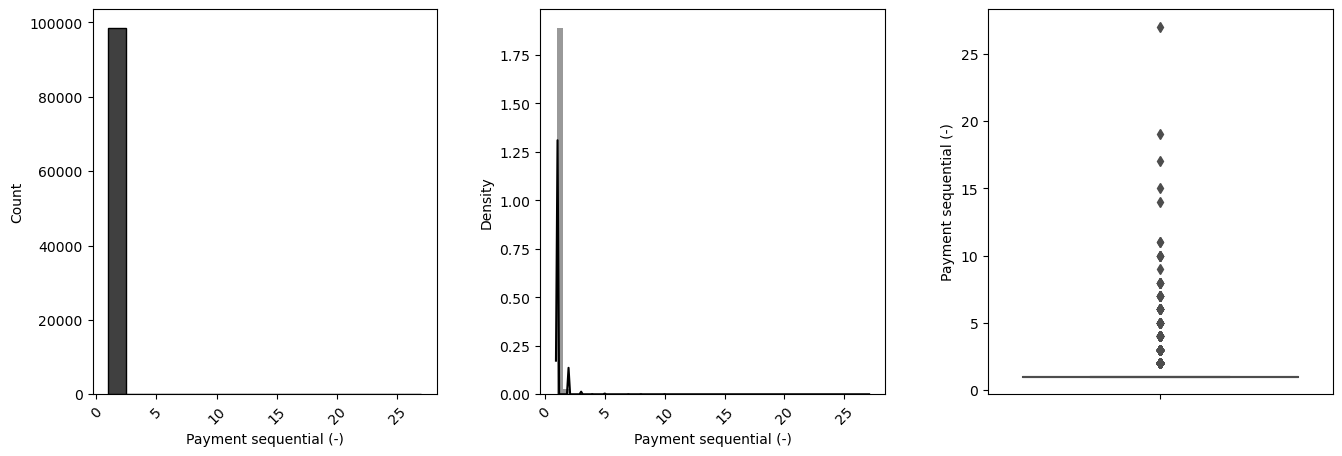

In [45]:
aux = num_attributes.copy()

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["payment_sequential"], color="black")
plt.xlabel("Payment sequential (-)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["payment_sequential"], color="black")
plt.xlabel("Payment sequential (-)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='payment_sequential',data=aux, color="gray")
plt.ylabel("Payment sequential (-)")

plt.subplots_adjust(wspace = 0.30);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


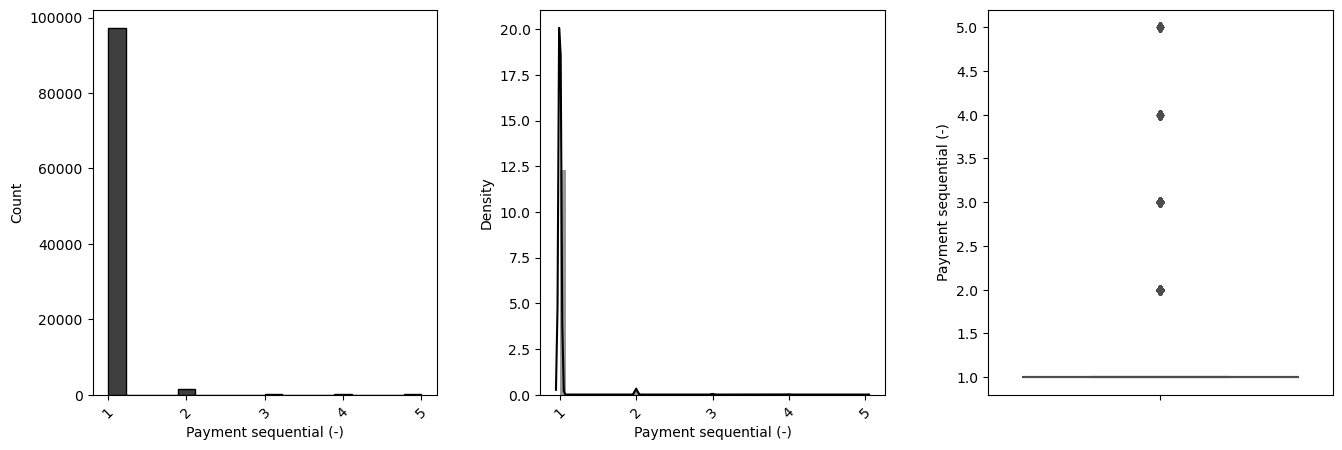

In [46]:
aux = num_attributes.copy()
aux = aux[aux["payment_sequential"] <= 5]

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["payment_sequential"], color="black")
plt.xlabel("Payment sequential (-)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["payment_sequential"], color="black")
plt.xlabel("Payment sequential (-)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='payment_sequential',data=aux, color="gray")
plt.ylabel("Payment sequential (-)")

plt.subplots_adjust(wspace = 0.30);

In [47]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(aux["payment_sequential"]).describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,98825.00,1.02,0.17,1.00,1.00,1.00,1.00,5.00


We are assuming by the analysis that `payment_sequential` means the number of payments done by the customer. 

- Removing outliers higher than 5, usually the number of `payment_sequential` is equal to 1. 
- That's the value for mean, median, percentile 25, percentile 50 and percentile 75.

#### Payment value

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


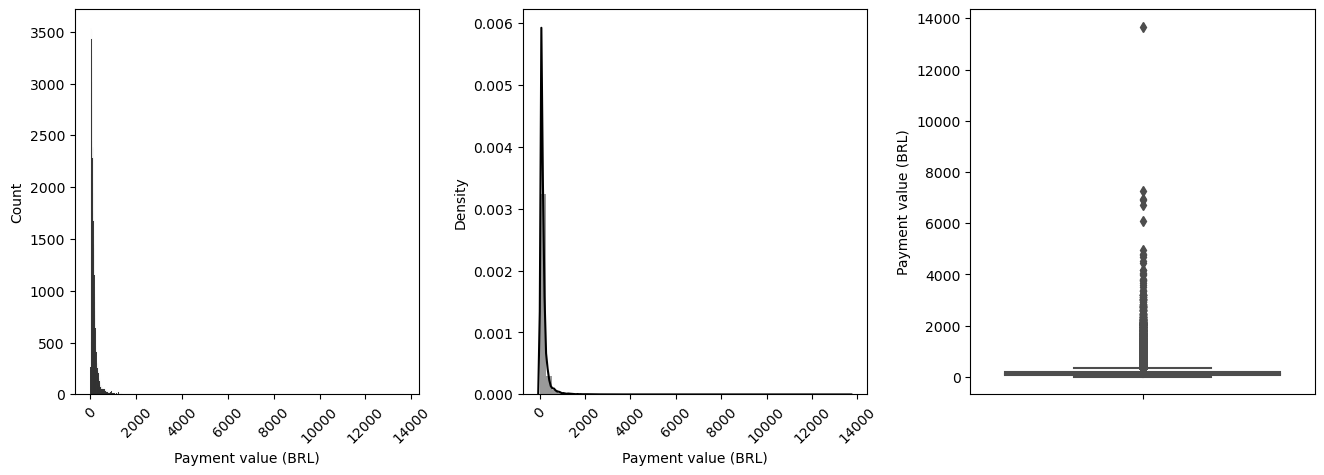

In [48]:
aux = num_attributes.copy()

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["payment_value"], color="black")
plt.xlabel("Payment value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["payment_value"], color="black")
plt.xlabel("Payment value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='payment_value',data=aux, color="gray")
plt.ylabel("Payment value (BRL)")

plt.subplots_adjust(wspace = 0.30);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


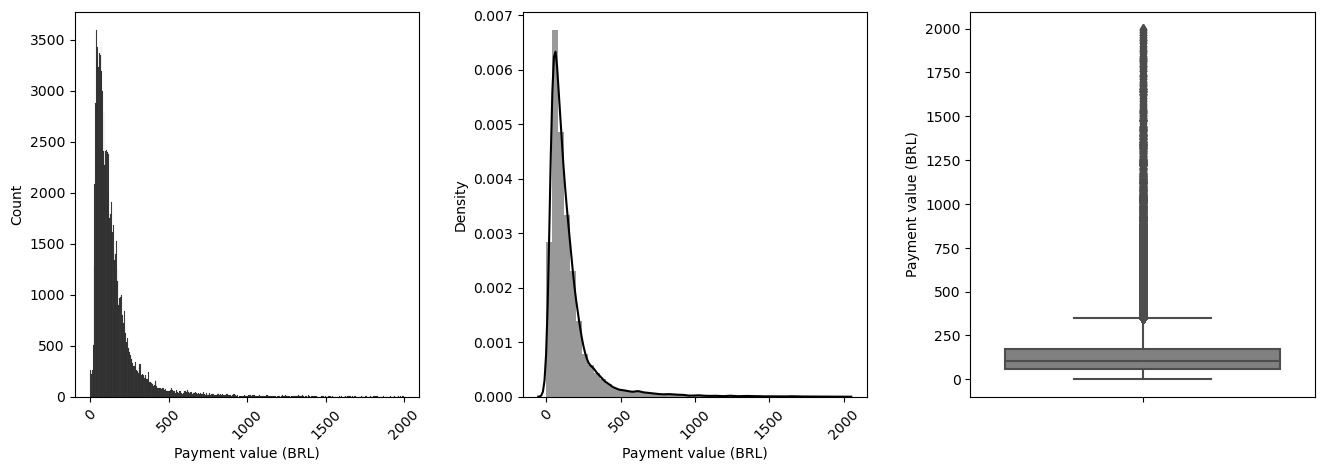

In [49]:
aux = num_attributes.copy()
aux = aux[aux["payment_value"] <= 2000]

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["payment_value"], color="black")
plt.xlabel("Payment value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["payment_value"], color="black")
plt.xlabel("Payment value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='payment_value',data=aux, color="gray")
plt.ylabel("Payment value (BRL)")

plt.subplots_adjust(wspace = 0.30);

In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(aux["payment_value"]).describe().T

,count,mean,std,min,25%,50%,75%,max
payment_value,98664.00,153.02,177.72,0.00,60.00,103.14,174.65,1996.32


We are assuming by the analysis that `payment_value` means the value of payment done by the customer. 

- Removing outliers higher than 2000, usually the `payment_value` is around 100. 
- Mean value is 153 BRL.
- Median value is 103 BRL.

#### Price

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


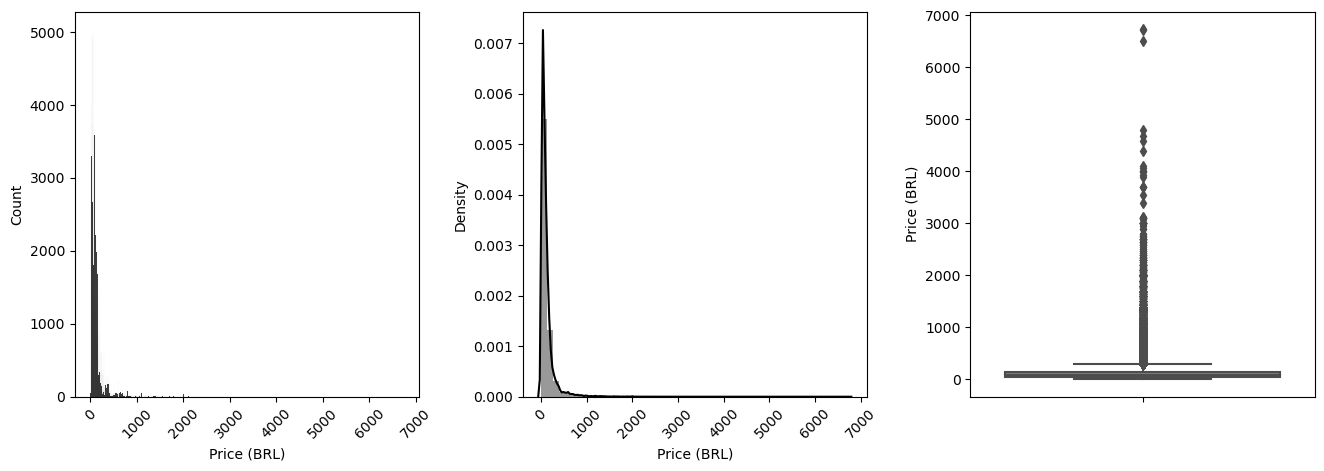

In [51]:
aux = num_attributes.copy()

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["price"], color="black")
plt.xlabel("Price (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["price"], color="black")
plt.xlabel("Price (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='price',data=aux, color="gray")
plt.ylabel("Price (BRL)")

plt.subplots_adjust(wspace = 0.30);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


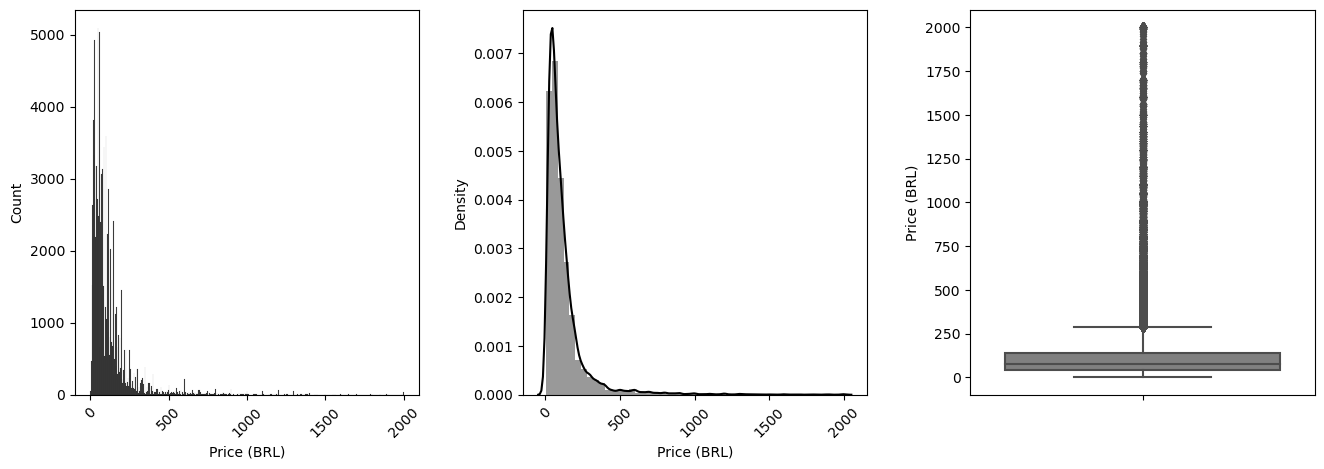

In [52]:
aux = num_attributes.copy()
aux = aux[aux["price"] <= 2000]

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["price"], color="black")
plt.xlabel("Price (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["price"], color="black")
plt.xlabel("Price (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='price',data=aux, color="gray")
plt.ylabel("Price (BRL)")

plt.subplots_adjust(wspace = 0.30);

In [53]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(aux["price"]).describe().T

,count,mean,std,min,25%,50%,75%,max
price,97988.00,122.75,164.57,0.85,41.50,79.00,139.90,1999.99


We are assuming by the analysis that `price` means the total price of the product. 

- Removing outliers higher than 2000, usually the `price` is around 100. 
- Mean value is 122 BRL.
- Median value is 79 BRL.

#### Freight value

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


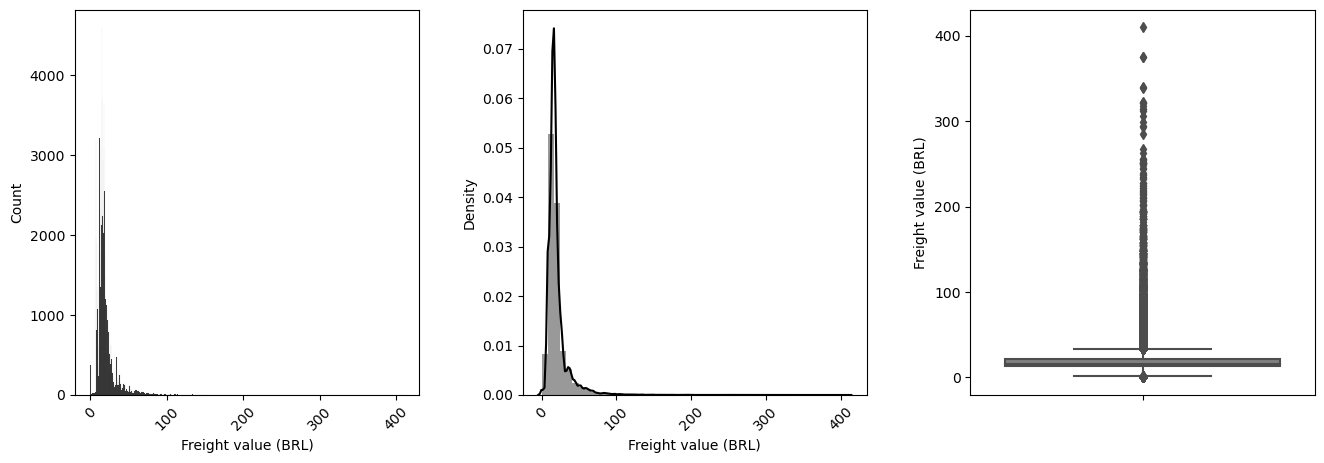

In [54]:
aux = num_attributes.copy()

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["freight_value"], color="black")
plt.xlabel("Freight value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["freight_value"], color="black")
plt.xlabel("Freight value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='freight_value',data=aux, color="gray")
plt.ylabel("Freight value (BRL)")

plt.subplots_adjust(wspace = 0.30);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


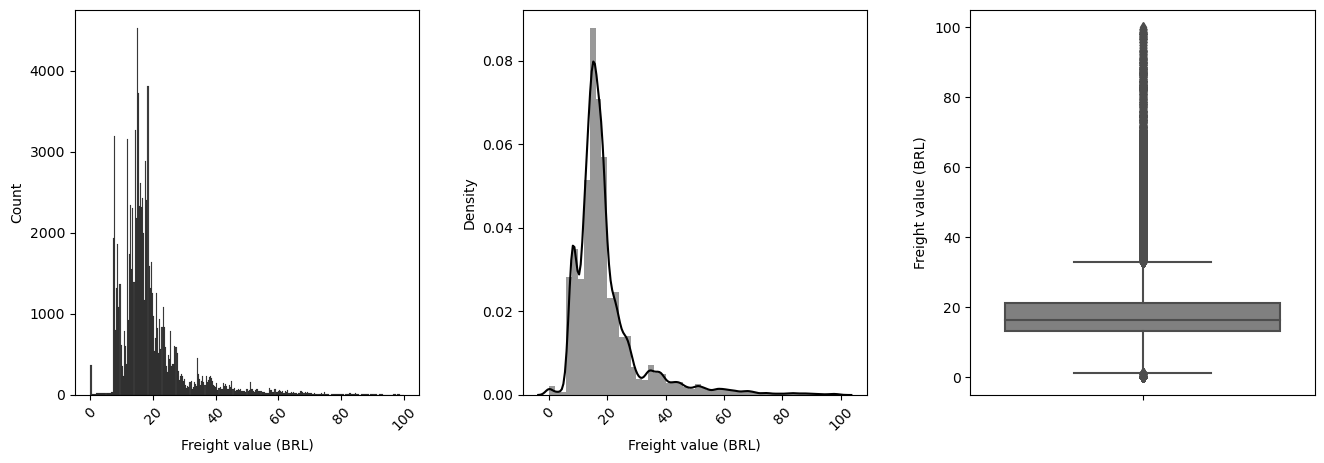

In [55]:
aux = num_attributes.copy()
aux = aux[aux["freight_value"] <= 100]

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["freight_value"], color="black")
plt.xlabel("Freight value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["freight_value"], color="black")
plt.xlabel("Freight value (BRL)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='freight_value',data=aux, color="gray")
plt.ylabel("Freight value (BRL)")

plt.subplots_adjust(wspace = 0.30);

In [56]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(aux["freight_value"]).describe().T

,count,mean,std,min,25%,50%,75%,max
freight_value,97503.00,19.42,12.07,0.00,13.24,16.32,21.15,99.97


We are assuming by the analysis that `freight_value` means the value of the freifht to deliver the product. 

- Removing outliers higher than 100, usually the `freight_value` is around 18. 
- Mean value is 19 BRL.
- Median value is 16 BRL.

#### Product weight (mass)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


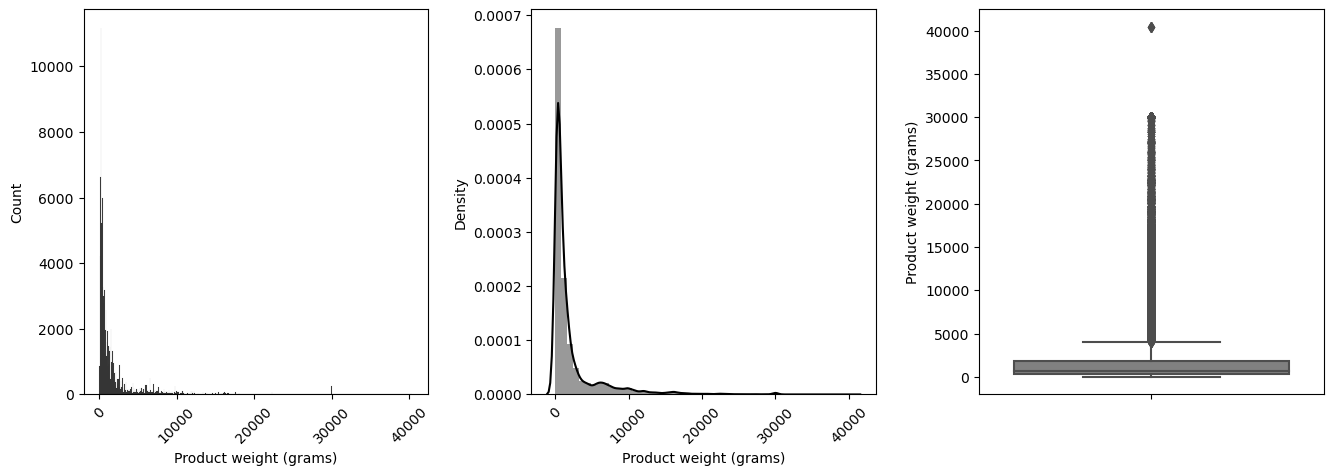

In [57]:
aux = num_attributes.copy()

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["product_weight_g"], color="black")
plt.xlabel("Product weight (grams)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["product_weight_g"], color="black")
plt.xlabel("Product weight (grams)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='product_weight_g',data=aux, color="gray")
plt.ylabel("Product weight (grams)")

plt.subplots_adjust(wspace = 0.30);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


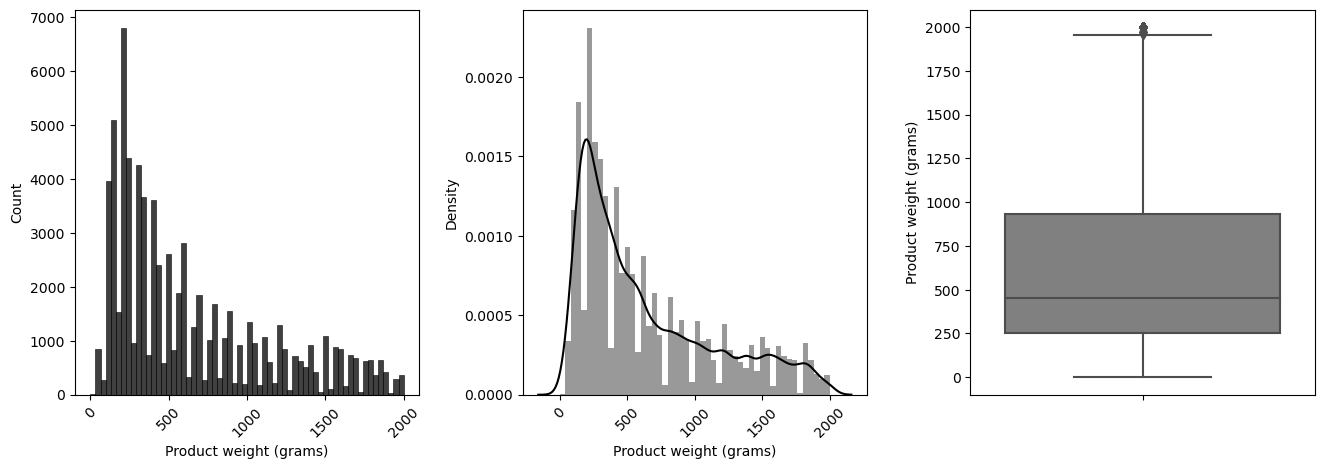

In [58]:
aux = num_attributes.copy()
aux = aux[aux["product_weight_g"] <= 2000]

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(aux["product_weight_g"], color="black")
plt.xlabel("Product weight (grams)")
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.distplot(aux["product_weight_g"], color="black")
plt.xlabel("Product weight (grams)")
plt.xticks(rotation=45);

plt.subplot(1,3,3)
sns.boxplot(y='product_weight_g',data=aux, color="gray")
plt.ylabel("Product weight (grams)")

plt.subplots_adjust(wspace = 0.30);

In [59]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(aux["product_weight_g"]).describe().T

,count,mean,std,min,25%,50%,75%,max
product_weight_g,75705.00,635.70,504.07,0.00,250.00,450.00,933.00,2000.00


We are assuming by the analysis that `product_weight_g` means the mass of the product. 

- Removing outliers higher than 2000, usually the `product_weight_g` is around 500 g. 
- Mean value is 636 BRL.
- Median value is 450 BRL.

### 1.5.2. Correlation Matrix

We use it in order to evaluate variables which are highly correlated. The objective is to exclude one of them. But, for this project we just want to gain business knowledge.

#### Pearson Correlation Coefficient

Pearson's correlation coefficient is used for linear correlation between variables.

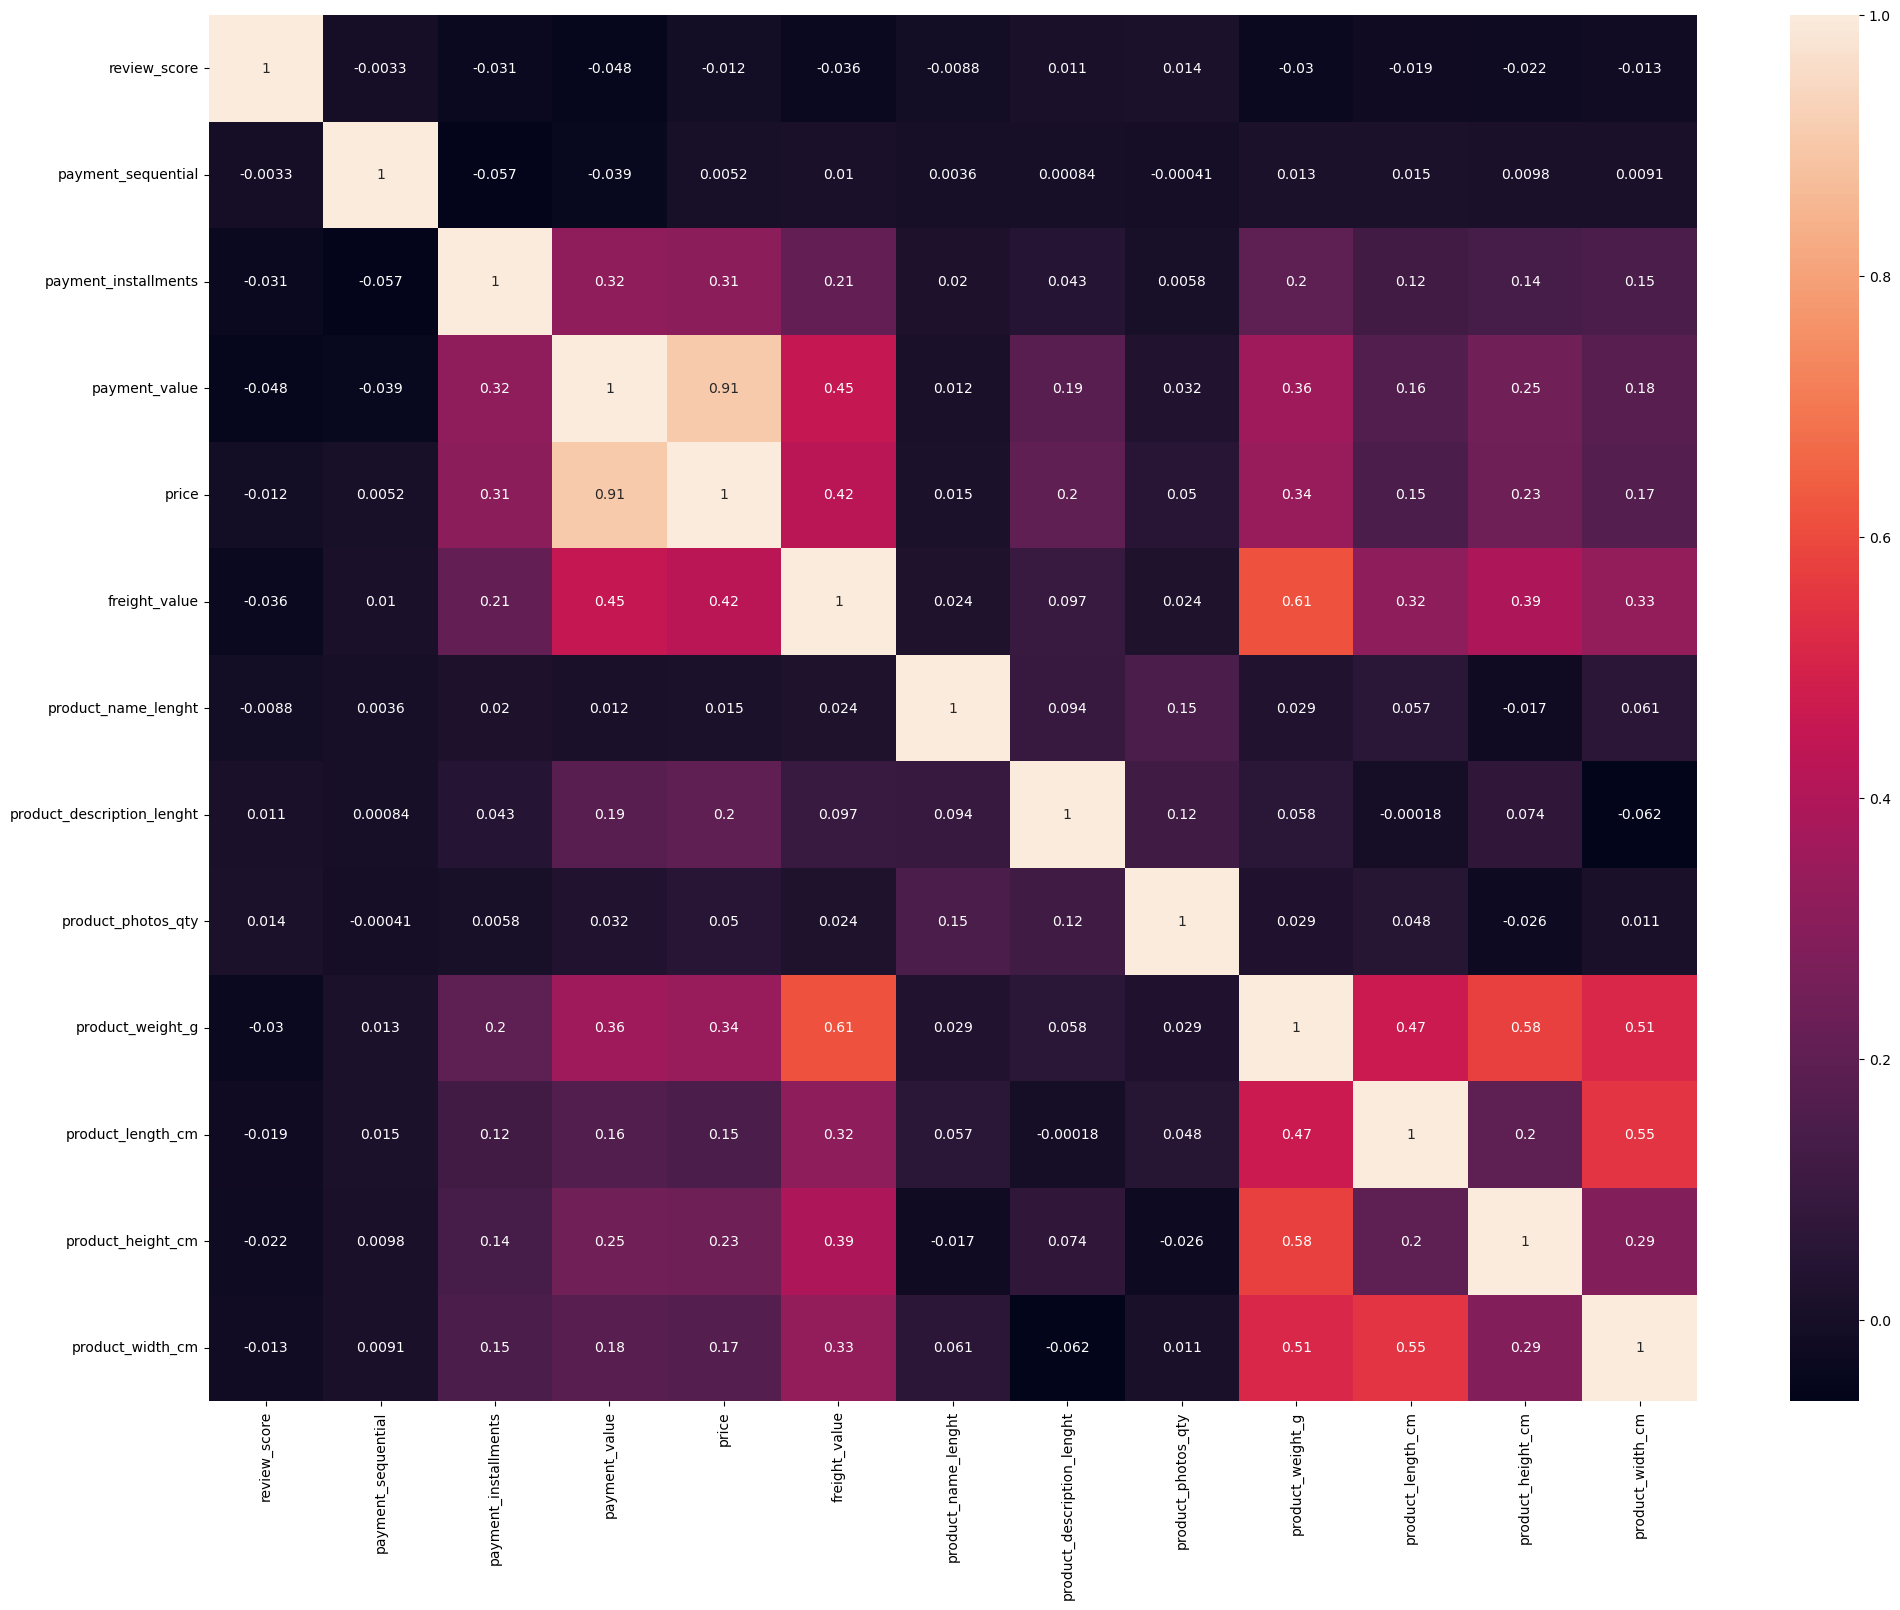

In [60]:
plt.figure(figsize = (24,18))

sns.heatmap(num_attributes.corr(method="pearson"), annot=True);

- `price` is high correlated to `payment_value`, which means the value of payment usully is the total price of the product. 
- The `product_weight_g` also presented a good correlation to `feight_value`, which is perfectly suitable since the value of the freight depends on the mass of the product.

#### Spearman Correlation Coefficient

Spearman's correlation coefficient is used to measure the monotonic correlation between variables. It is appropriate to use Spearman's correlation coefficient for nonlinear relationships.

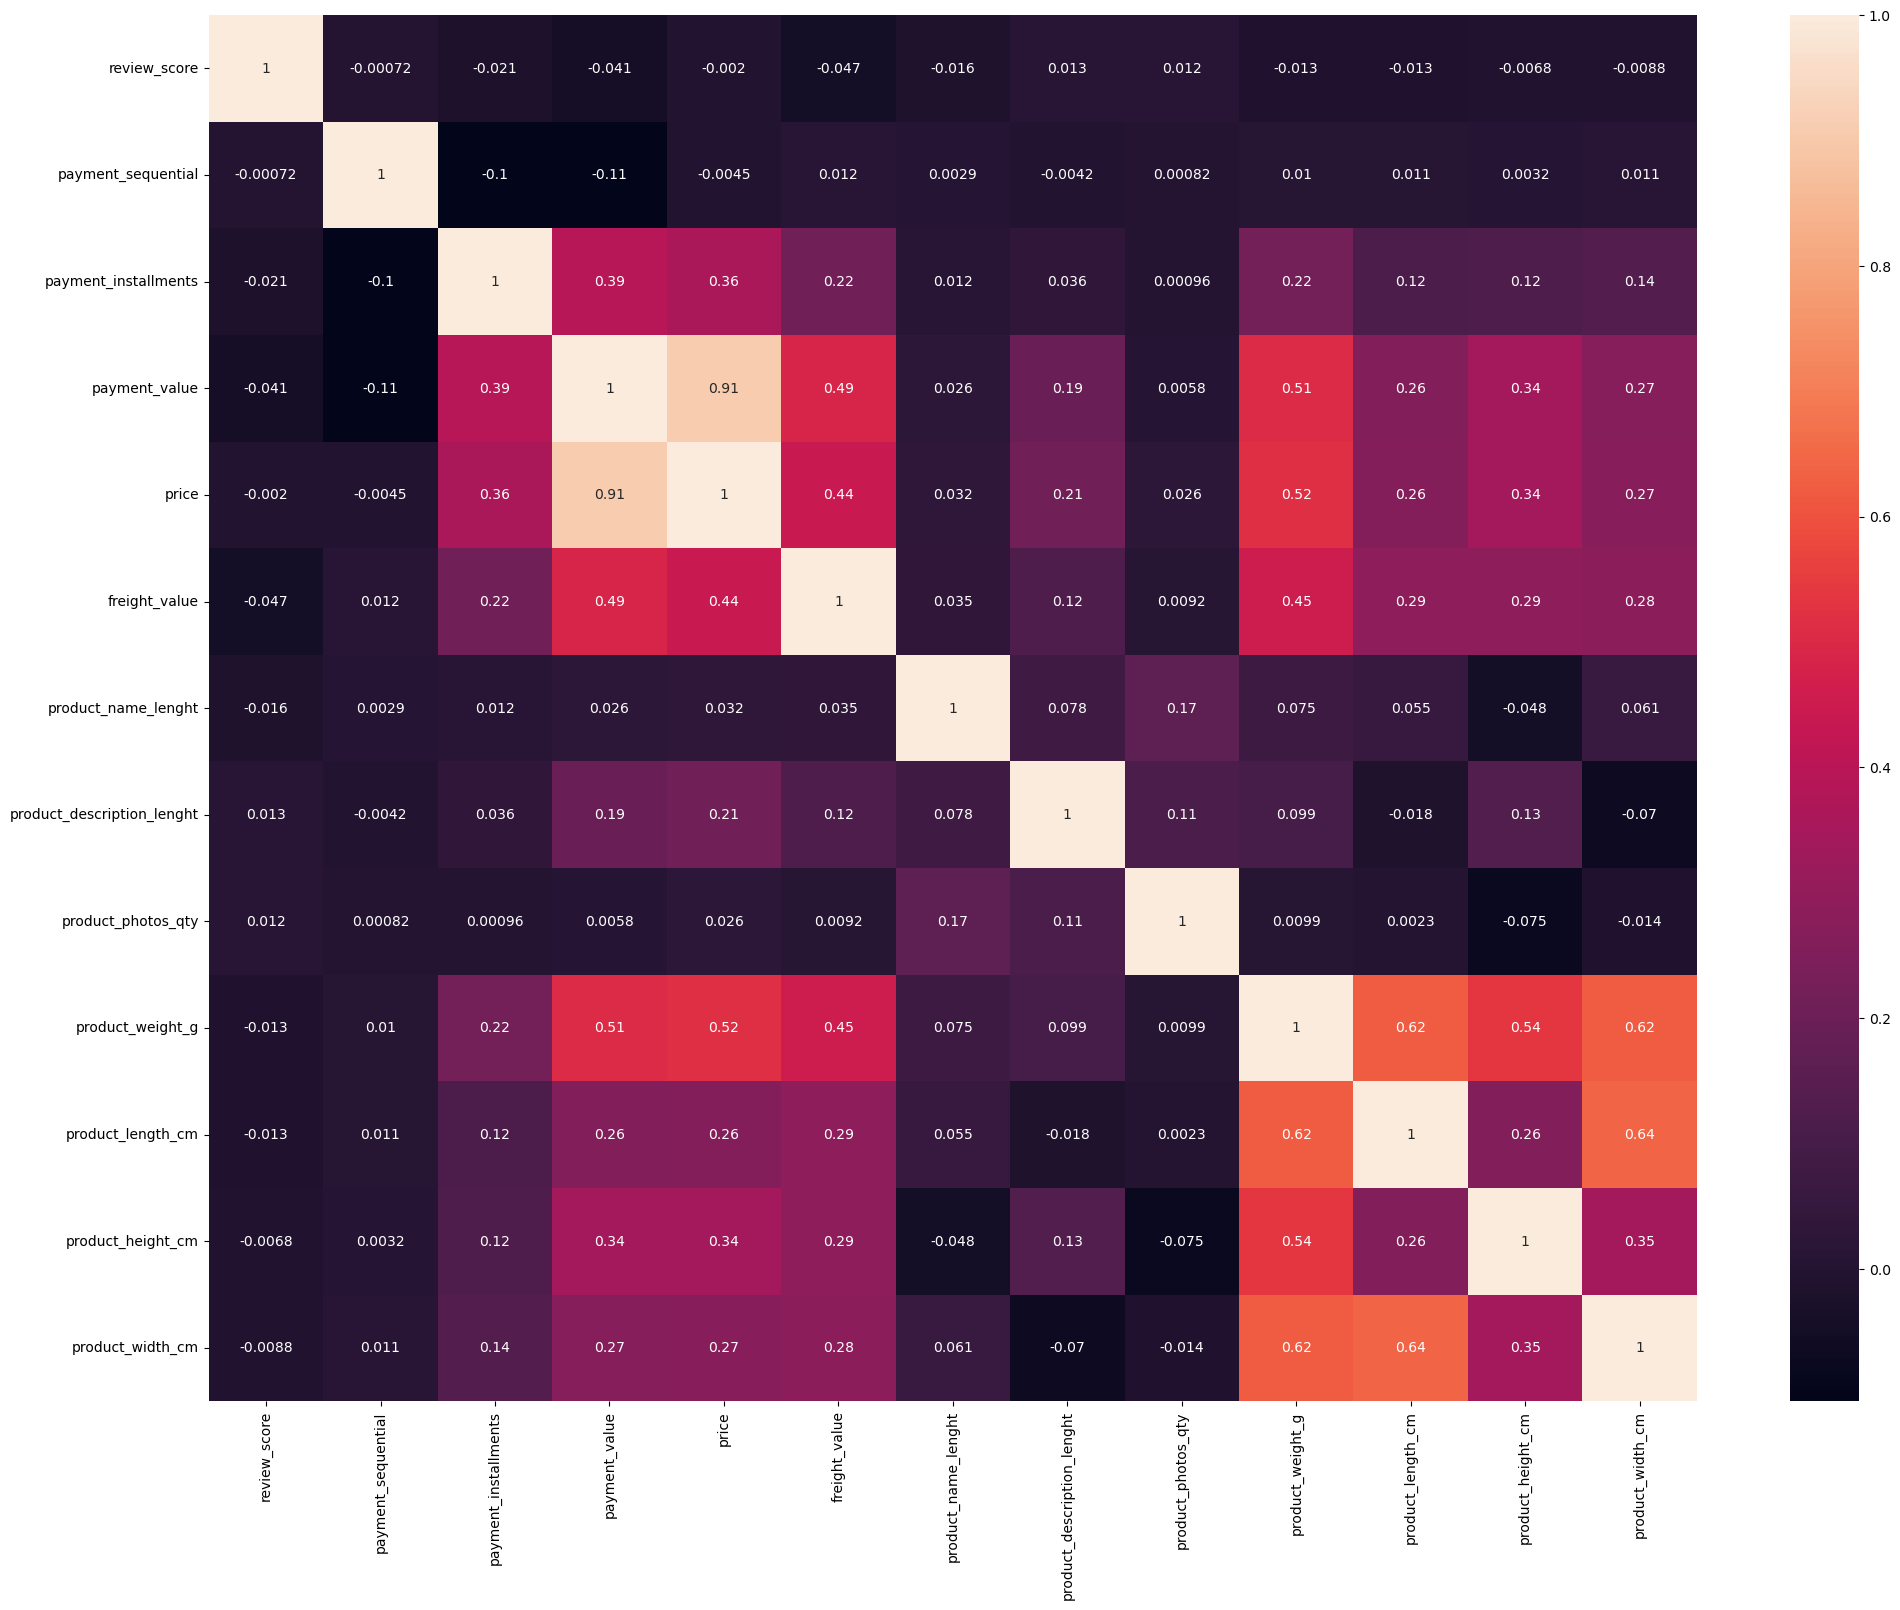

In [61]:
plt.figure(figsize = (24,18))

sns.heatmap(num_attributes.corr(method="spearman"), annot=True);

#### Kendall Correlation Coefficient

Kendall's correlation coefficient, also known as Kendall's tau, is used to measure the strength and direction of the ordinal association between variables. It is appropriate to be used for ordinal and classified data, as well as for non-linear relationships between variables.

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


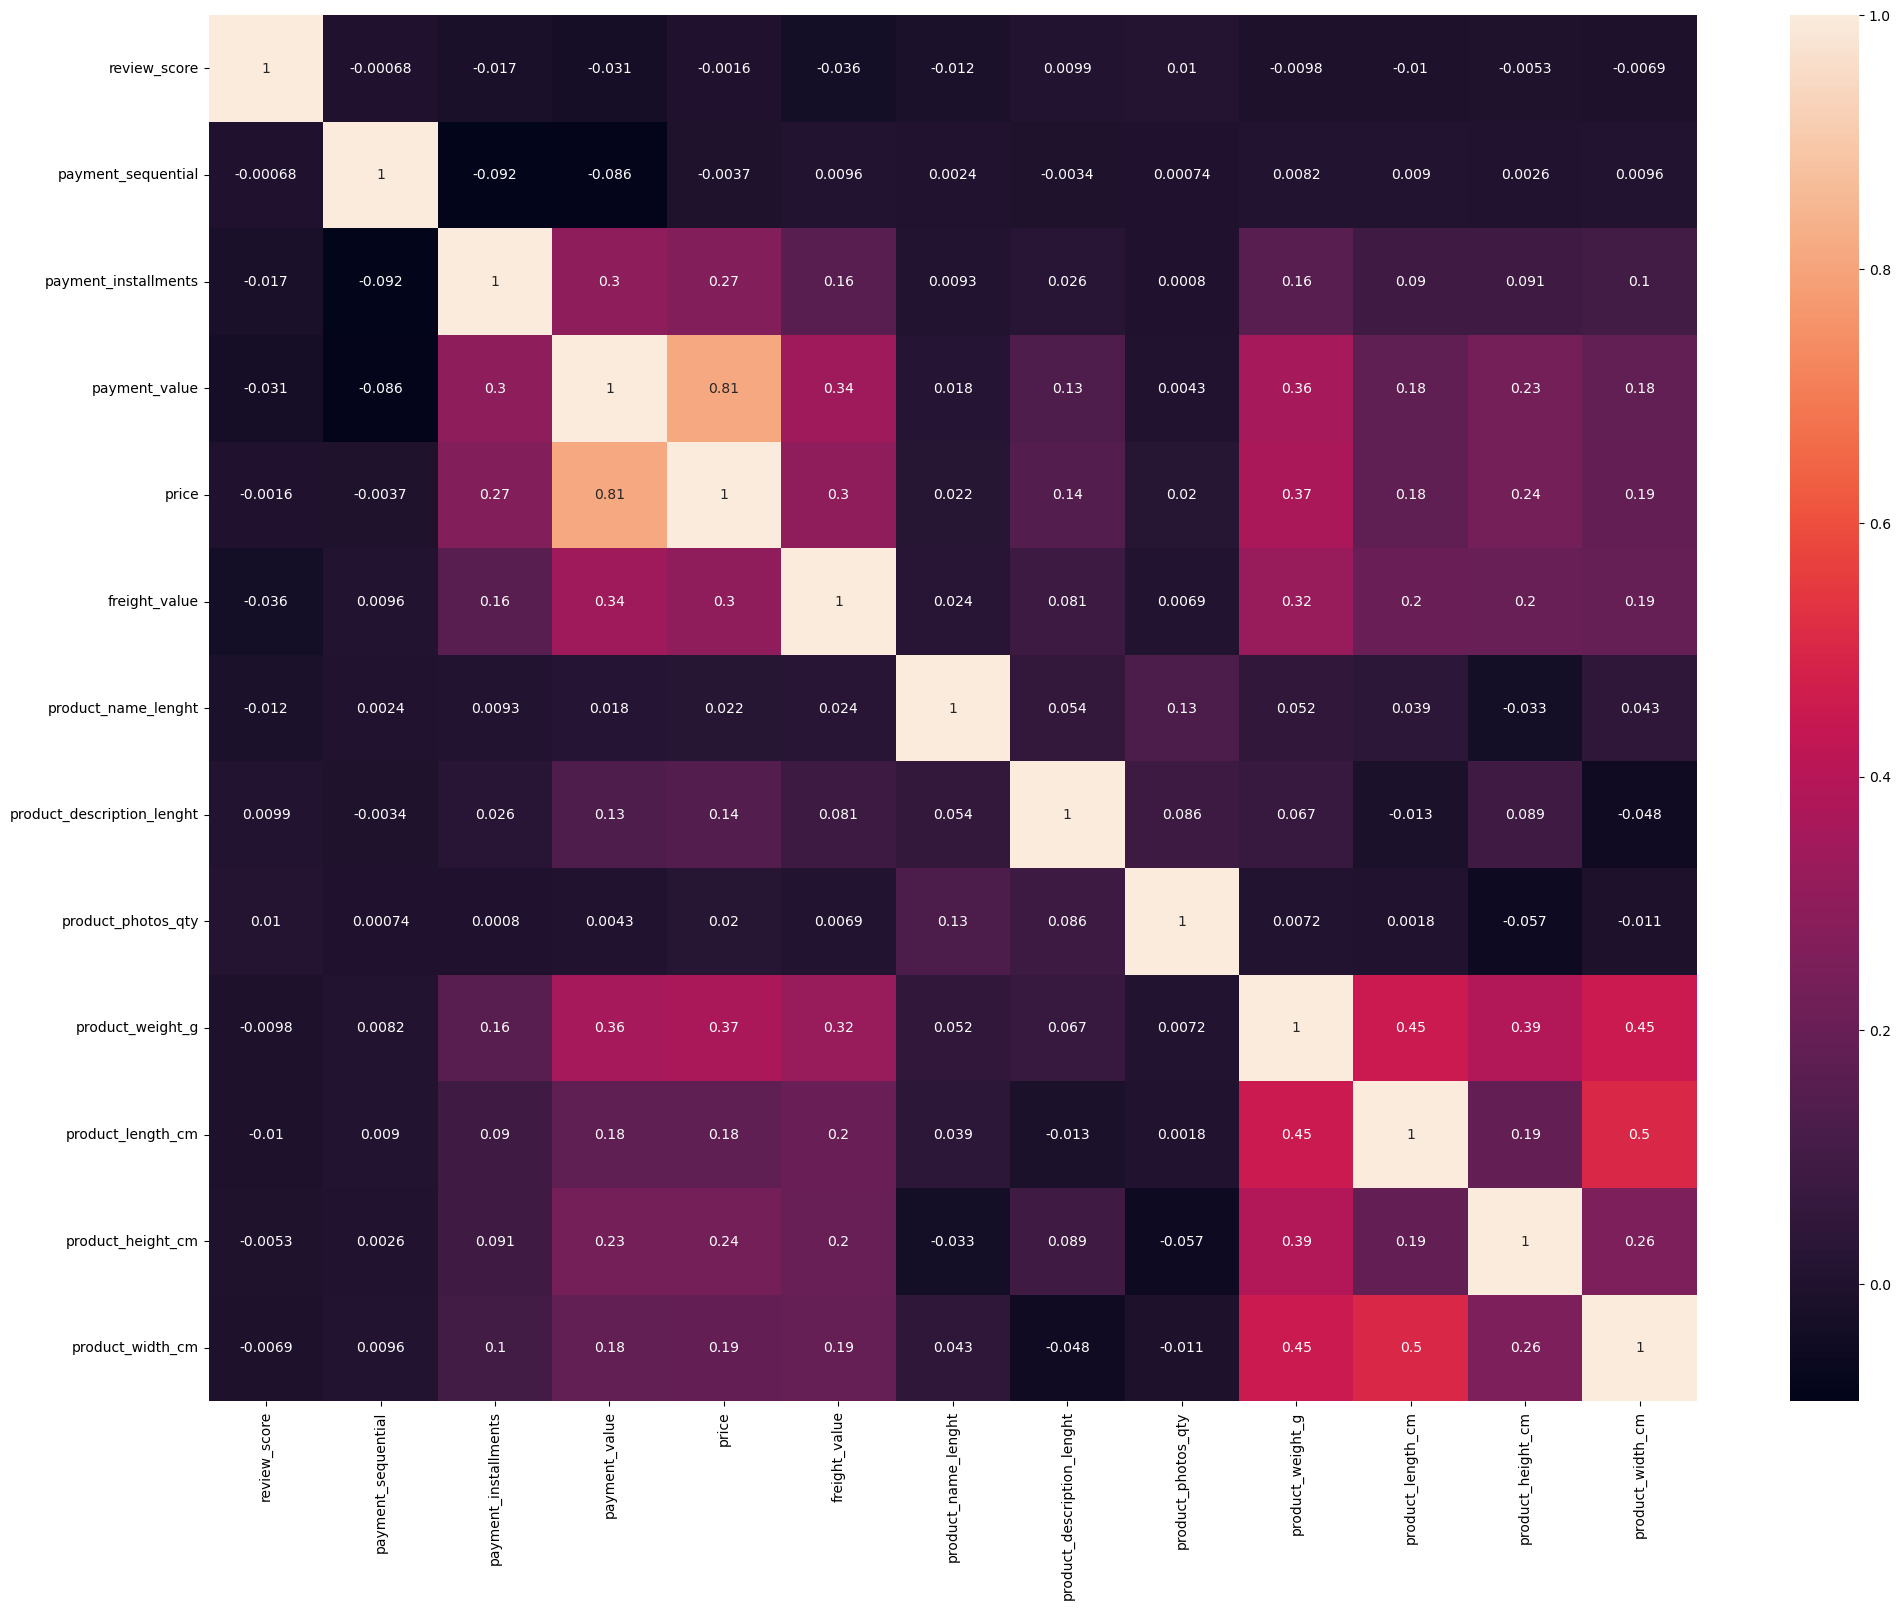

In [62]:
plt.figure(figsize = (24,18))

sns.heatmap(num_attributes.corr(method="kendall"), annot=True);

### 1.5.3. Categorical Attributes

In [63]:
cat_attributes.apply(lambda x: x.unique().shape[0])

customer_city            4117
customer_state             27
payment_type                6
product_category_name      74
seller_city               611
seller_state               24
geolocation_city           17
geolocation_state           8
dtype: int64

In [64]:
cat_attributes.apply(lambda x: x.unique())

customer_city            [osasco, itapecerica, nova venecia, mendonca, ...
customer_state           [SP, MG, ES, RJ, RS, BA, CE, PR, MS, PB, SC, M...
payment_type             [credit_card, boleto, voucher, debit_card, not...
product_category_name    [brinquedos, beleza_saude, bebes, cool_stuff, ...
seller_city              [laranjal paulista, belo horizonte, rio de jan...
seller_state             [SP, MG, RJ, SC, RS, PR, nan, MA, BA, DF, PI, ...
geolocation_city         [nan, sao joaquim da barra, curitiba, sao jose...
geolocation_state                        [nan, SP, PR, SC, MG, RN, RJ, RS]
dtype: object

### 1.5.4. Correlation Matrix

In [65]:
cat_attributes_list = cat_attributes.columns.tolist()

corr_dict = {}
for i in range( len (cat_attributes_list)):
    corr_list = []
    for j in range(len( cat_attributes_list)):
        ref = cat_attributes_list[i]
        feat = cat_attributes_list[j]
        
        # correlation
        corr = cramers_v(cat_attributes[ref], cat_attributes[feat])
        
        # append a list
        corr_list.append(corr)
    
    # append a correlation list for each ref attribute
    corr_dict[ref] = corr_list

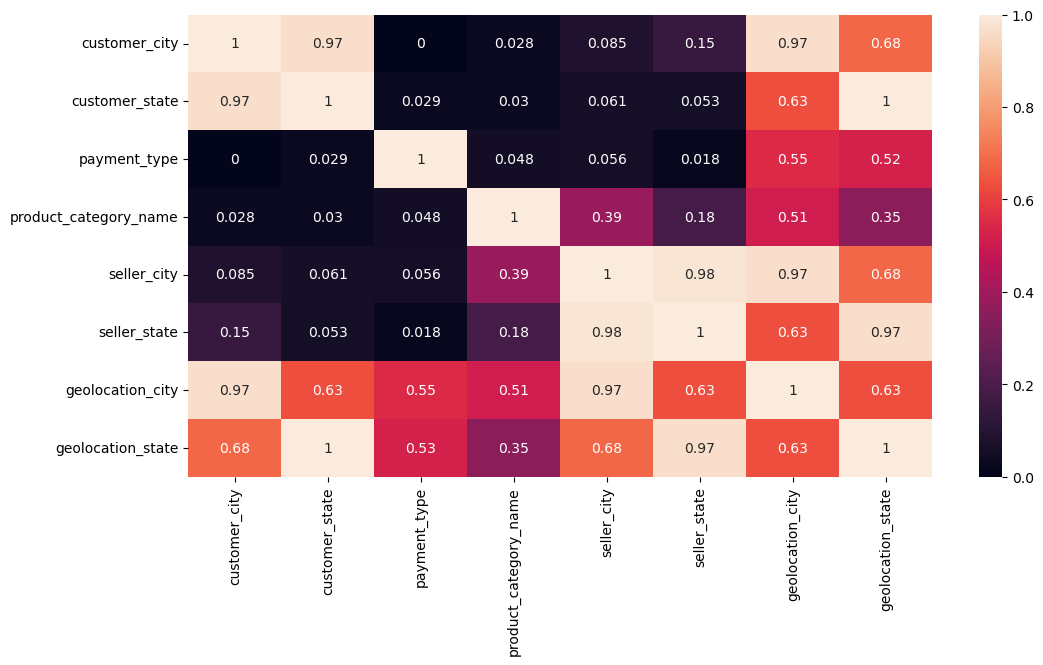

In [66]:
plt.figure(figsize =(12,6))

d = pd.DataFrame(corr_dict)
d = d.set_index(d.columns)
sns.heatmap(d, annot=True);

- The high correlated categorical features are those which indicate location.

# 2. Exploratory Data Analysis (EDA)

In [67]:
df2 = df1.copy()

## 2.1. Orders Analysis

In this section, we analyzed the amount of orders through time and per some categories.

### Orders per status

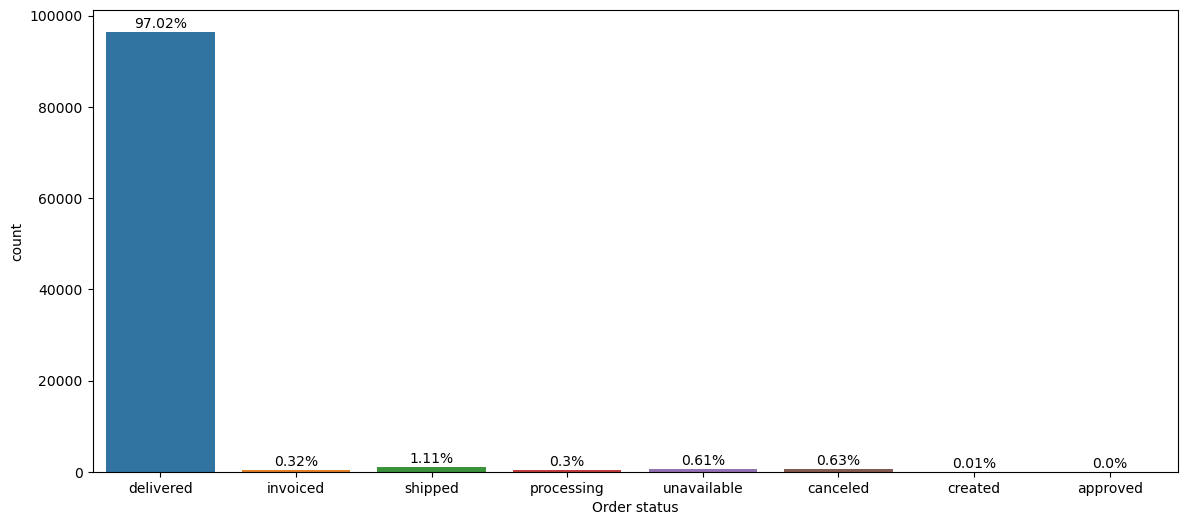

In [174]:
df_orders = olist_orders.merge(olist_customer, how='left', on='customer_id')
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1 = sns.countplot(x='order_status', data = df_orders)
plt.xlabel("Order status")
for p in ax1.patches:
        ax1.annotate(format(str((p.get_height()/len(df_orders)*100).round(2)) + '%'), 
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', 
                    va='center', 
                    xytext=(0,6),
                    textcoords='offset points')
plt.show()

### Time trend

In [74]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


In [79]:
def format_spines(ax, right_border=True):
    """
    Format the spines of a matplotlib axis.

    Parameters:
    - ax: Matplotlib axis
    - right_border: Boolean, default is True. If True, show the right border of the plot.
    """
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(right_border)
    ax.spines['bottom'].set_color('#3f3f3f')
    ax.spines['left'].set_color('#3f3f3f')
    ax.tick_params(axis='both', colors='#3f3f3f')

def single_countplot(data, x, ax, order=None, palette=None):
    """
    Create a countplot on a single axis.

    Parameters:
    - data: DataFrame
    - x: Column name for the x-axis
    - ax: Matplotlib axis
    - order: Order of the categories, if specified
    - palette: Color palette for the plot
    """
    sns.countplot(data=data, x=x, ax=ax, order=order, palette=palette)

/var/folders/p8/gqg5wqj951j06qtpr3cpkmrr0000gr/T/ipykernel_95808/3291553701.py:45: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


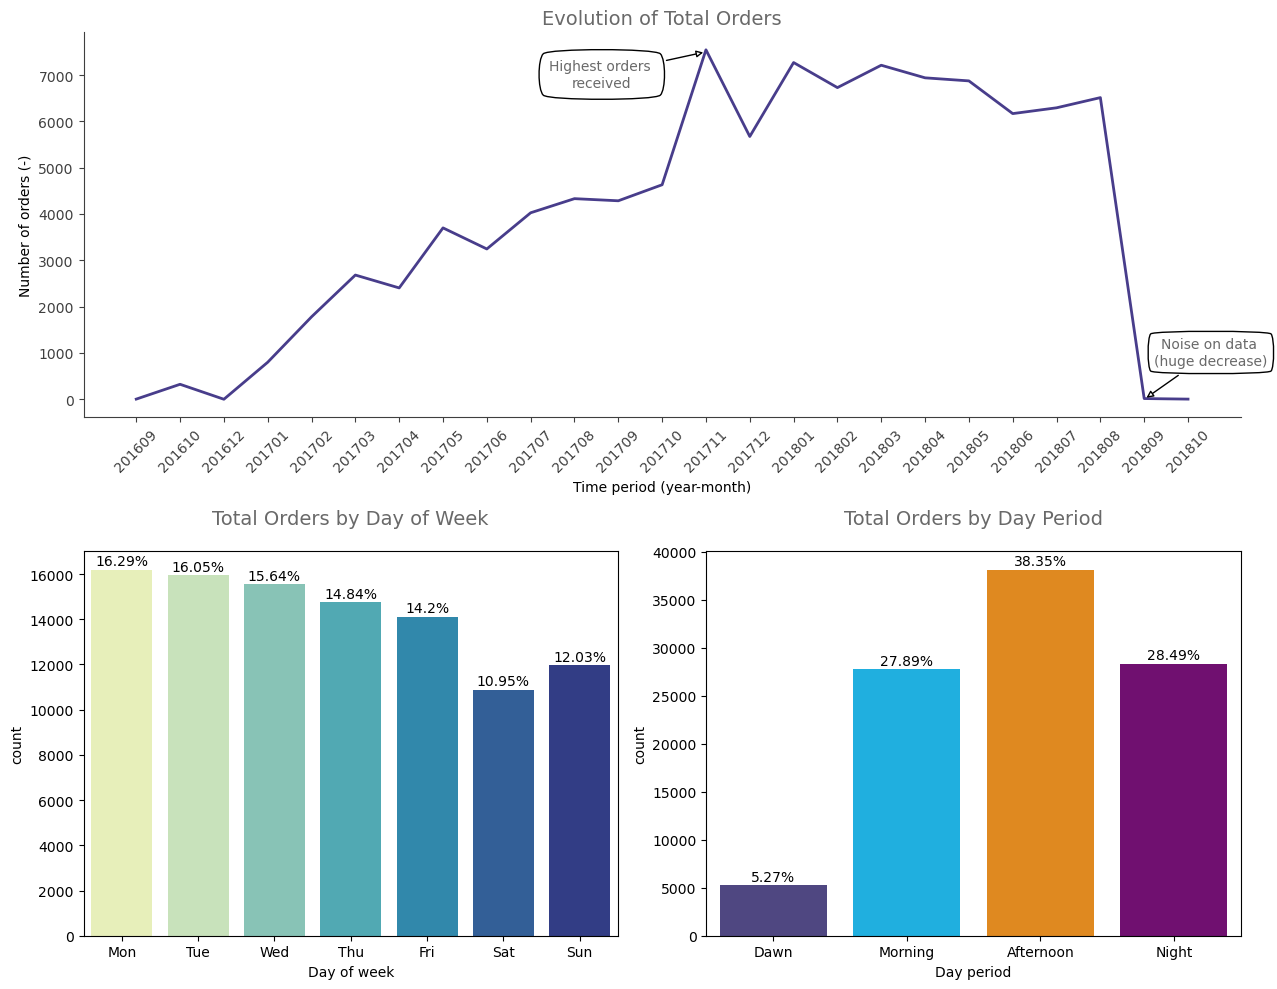

In [98]:
# Create a 2x2 subplot layout using gridspec
fig = plt.figure(constrained_layout=True, figsize=(13, 10))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Chart 1: Lineplot - Evolution of e-commerce orders along time 
ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1,
             color='darkslateblue', linewidth=2)
plt.xlabel("Time period (year-month)")
plt.ylabel("Number of orders (-)")
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders', size=14, color='dimgrey')

# Chart 2: Barchart - Total of orders by day of week
ax2 = fig.add_subplot(gs[1, 0])
single_countplot(df_orders, x='order_purchase_dayofweek', ax=ax2, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)
plt.xlabel("Day of week")
for p in ax2.patches:
    ax2.annotate(format(str((p.get_height()/len(df_orders)*100).round(2)) + '%'), 
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha='center', va='center', xytext=(0, 6), textcoords='offset points')

# Chart 3: Barchart - Total of orders by time of the day
ax3 = fig.add_subplot(gs[1, 1])
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(df_orders, x='order_purchase_time_day', ax=ax3, palette=day_color_list)
ax3.set_title('Total Orders by Day Period', size=14, color='dimgrey', pad=20)
plt.xlabel("Day period")
for p in ax3.patches:
    ax3.annotate(format(str((p.get_height()/len(df_orders)*100).round(2)) + '%'), 
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.tight_layout()
plt.show();

- There was a growing demand for online purchase since 2016 up to 2018. After 2018-08 probably there was a noise because of the huge decrease.
- Monday and Tuesday were the more frequent days which the customers were used to buy on.
- The customers were also more prone to buy in the afternoon.

### Orders comparison per year

In [151]:
df_orders_compare = df_orders.query('order_purchase_year in (2016, 2017, 2018) & order_purchase_month <= 12')
df_orders_compare['orders'] = df_orders_compare.groupby(['order_purchase_year', 'order_purchase_month'])['order_purchase_month'].transform('count')

In [152]:
aux = df_orders_compare.copy()

aux = aux[["order_purchase_year", "order_purchase_month", "orders"]].\
      drop_duplicates().copy()

In [154]:
aux = aux[["orders", "order_purchase_year"]].groupby("order_purchase_year").sum().reset_index()

In [156]:
aux['delta_abs_orders'] = aux['orders'].diff().fillna(0.0)
aux['delta_rel_orders'] = aux['orders'].pct_change().fillna(0.0)

In [157]:
aux

,order_purchase_year,orders,delta_abs_orders,delta_rel_orders
0,2016,329,0.00,0.00
1,2017,45101,44772.00,136.09
2,2018,54011,8910.00,0.20


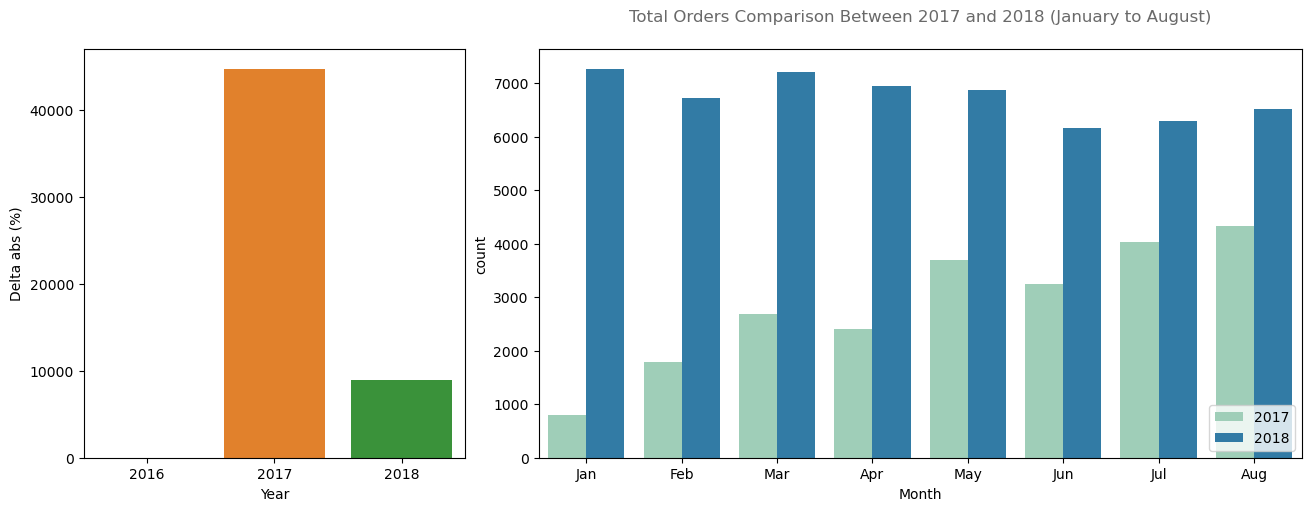

In [173]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = gridspec.GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# waterfall chart
sns.barplot(x='order_purchase_year', y='delta_abs_orders', data=aux, ax=ax1)
ax1.set_ylabel("Delta abs (%)")
ax1.set_xlabel("Year")

# restarting dataset
df_orders_compare = df_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')

# Bar chart - Comparison between monthly sales between 2017 and 2018
sns.countplot(data=df_orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2,
              palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
ax2.set_xlabel("Month")
plt.legend(loc='lower right')
plt.show()


## 2.2. Location Analysis

In this section we analyzed the customers through their locations.

In [177]:
# Merging orders and order_items
df_orders_items = df_orders.merge(olist_order_items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')

# Extracting the relevant content from the API response :: state
content = [c['UF'] for c in json.loads(r.text)]

# Creating a DataFrame from the extracted content
br_info = pd.DataFrame(content)

# Extracting and creating a new column for the region names
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])

# Dropping the 'regiao' column, as we have already extracted the region names
br_info.drop('regiao', axis=1, inplace=True)

# Removing duplicate rows in the DataFrame
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = olist_geolocation[olist_geolocation.geolocation_lat <= 5.27438888]

#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]

#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]

#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]

geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,35,SP,São Paulo,Sudeste,3149.00,-23.58,-46.59,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,22.76,29,BA,Bahia,Nordeste,47813.00,-12.95,-45.02,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,52,GO,Goiás,Centro-Oeste,75265.00,-16.75,-48.52,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,24,RN,Rio Grande do Norte,Nordeste,59296.00,-5.78,-35.28,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,35,SP,São Paulo,Sudeste,9195.00,-23.76,-46.52,santo andre,SP


### Customers per region, state and city

In [181]:
# Convert the 'order_purchase_timestamp' column to datetime format
df_orders_items['order_purchase_timestamp'] = pd.to_datetime(df_orders_items['order_purchase_timestamp'])

# Creating a new column 'order_purchase_year_month' with the desired format
df_orders_items['order_purchase_year_month'] = df_orders_items['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [185]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'] >= "2017-01")]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'] <= "2018-08")]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

In [199]:
class AnnotateBars:
    def __init__(self, n_dec, font_size, color='black', **kwargs):
        self.n_dec = n_dec
        self.font_size = font_size
        self.color = color
        self.kwargs = kwargs

    def horizontal(self, ax, padding=0):
        total_orders = len(df_orders_filt)
        for p in ax.patches:
            count = p.get_width()
            percentage = count / total_orders * 100
            text = f'{count}\n({percentage:.2f}%)'
            _x = p.get_x() + p.get_width() + float(padding)
            _y = p.get_y() + p.get_height() / 2
            ax.text(_x, _y, text, ha='left', va='center',
                    fontsize=self.font_size, color=self.color, **self.kwargs)


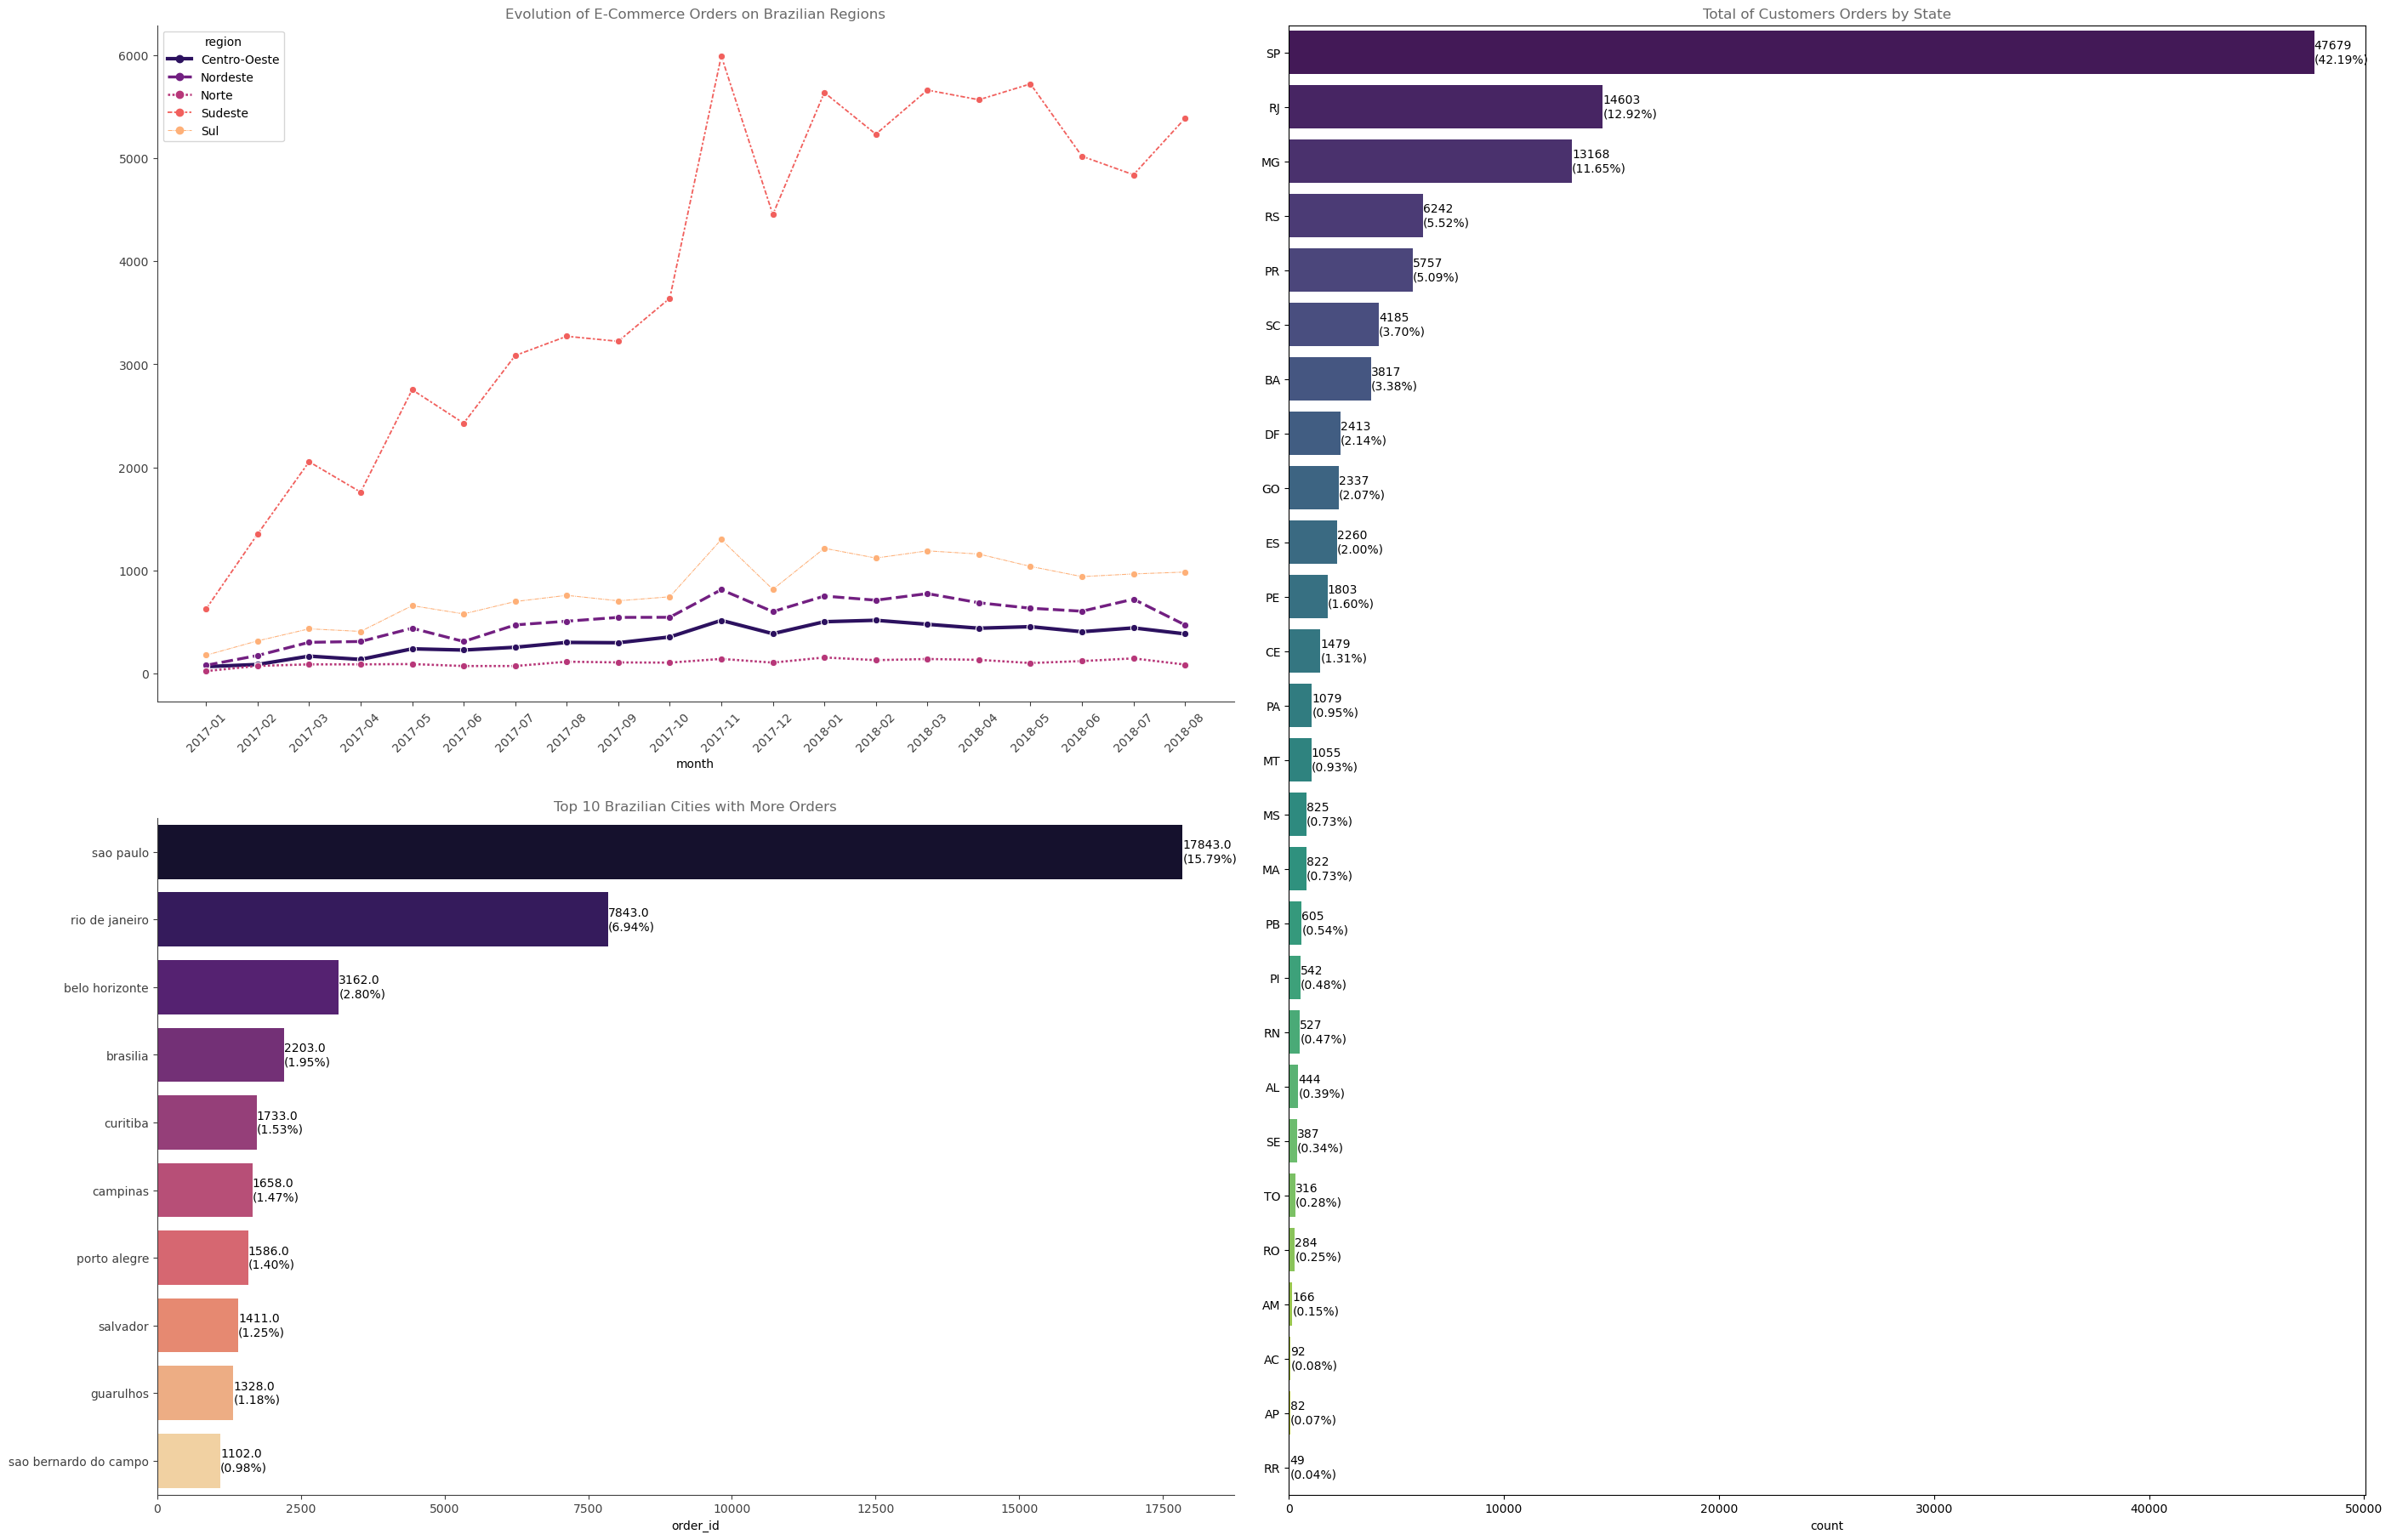

In [205]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(28, 18))
gs = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(x='month', y='order_count', ax=ax1, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
format_spines(ax1, right_border=False)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top cities with more customers orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax2)
format_spines(ax2, right_border=False)
ax2.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
ax2.set_ylabel('')

# Total orders by state
sns.countplot(y='customer_state', data=df_orders_filt, ax=ax3, palette='viridis',
              order=df_orders_filt['customer_state'].value_counts().index)
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax3)
ax3.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')

plt.show()